In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_team=pd.read_csv("Final_merge.csv")
df_team

,Unnamed: 0,GAME_ID,GAME_DATE,Team_Home,Team_Away,TEAM_ID_Home,TEAM_ID_Away,W/L_Home,OffRtg_Home,DefRtg_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
0,0,22200315,11/30/2022,BKN,WAS,1610612751,1610612764,W,111.9,107.0,...,6,24,0.250,23,34,0.676,47.2,51.5,100.5,45.6
1,1,22200313,11/30/2022,ORL,ATL,1610612753,1610612737,L,105.9,122.5,...,8,32,0.250,15,19,0.789,58.5,61.1,102.0,58.6
2,2,22200320,11/30/2022,DEN,HOU,1610612743,1610612745,W,127.7,106.4,...,12,41,0.293,14,18,0.778,48.9,52.1,94.0,37.0
3,3,22200321,11/30/2022,PHX,CHI,1610612756,1610612741,W,126.9,108.7,...,4,25,0.160,27,33,0.818,52.4,58.5,104.0,46.2
4,4,22200316,11/30/2022,NYK,MIL,1610612752,1610612749,L,107.3,114.7,...,10,35,0.286,21,26,0.808,48.9,53.7,95.5,57.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,8608,21500014,10/28/2015,PHX,DAL,1610612756,1610612742,L,92.2,106.7,...,10,21,0.476,21,31,0.677,52.9,56.3,103.5,67.7
8609,8609,21500005,10/28/2015,BOS,PHI,1610612738,1610612755,W,109.8,92.2,...,7,22,0.318,20,23,0.870,45.2,51.0,102.5,37.0
8610,8610,21500003,10/27/2015,GSW,NOP,1610612744,1610612740,W,107.8,93.1,...,6,18,0.333,19,27,0.704,45.8,50.1,102.5,37.5
8611,8611,21500002,10/27/2015,CHI,CLE,1610612741,1610612739,W,99.0,96.9,...,9,29,0.310,10,17,0.588,45.2,46.8,98.0,52.1


In [3]:
df_team.dropna(how="any",inplace=True)


#Finding games between 2018/10/16 and 2022/4/10

df_team['GAME_DATE'] = pd.to_datetime(df_team['GAME_DATE'])  



In [4]:
df_team = df_team[(df_team['GAME_DATE'] > '2018-10-16') & (df_team['GAME_DATE'] <= '2022-4-10')]
df_team.columns

Index(['Unnamed: 0', 'GAME_ID', 'GAME_DATE', 'Team_Home', 'Team_Away',
       'TEAM_ID_Home', 'TEAM_ID_Away', 'W/L_Home', 'OffRtg_Home',
       'DefRtg_Home', 'NetRtg_Home', 'AST%_Home', 'AST/TO_Home',
       'ASTRatio_Home', 'OREB%_Home', 'DREB%_Home', 'REB%_Home', 'TOV%_Home',
       'FGM_Home', 'FGA_Home', 'FG_PCT_Home', 'FG3M_Home', 'FG3A_Home',
       'FG3_PCT_Home', 'FTM_Home', 'FTA_Home', 'FT_PCT_Home', 'eFG%_Home',
       'TS%_Home', 'PACE_Home', 'PIE_Home', 'W/L_Away', 'OffRtg_Away',
       'DefRtg_Away', 'NetRtg_Away', 'AST%_Away', 'AST/TO_Away',
       'ASTRatio_Away', 'OREB%_Away', 'DREB%_Away', 'REB%_Away', 'TOV%_Away',
       'FGM_Away', 'FGA_Away', 'FG_PCT_Away', 'FG3M_Away', 'FG3A_Away',
       'FG3_PCT_Away', 'FTM_Away', 'FTA_Away', 'FT_PCT_Away', 'eFG%_Away',
       'TS%_Away', 'PACE_Away', 'PIE_Away'],
      dtype='object')

In [177]:
def win (x):
    if x=="W":
        return 1
    else:
        return 0
#Overall Homecourt advantage in each seasons.
df_team["Winning_Home"]=df_team["W/L_Home"].map(lambda s: win(s))

#### Splitting into different seasons

    

In [5]:
df_team["GAME_ID"].astype(str).str.split("").str[2:4]

324     [2, 1]
325     [2, 1]
326     [2, 1]
327     [2, 1]
328     [2, 1]
         ...  
4916    [1, 8]
4917    [1, 8]
4918    [1, 8]
4919    [1, 8]
4920    [1, 8]
Name: GAME_ID, Length: 4597, dtype: object

In [6]:
df_team["season"]=df_team["GAME_ID"].astype(str).str.split("").str[2:4]
df_team["season"]=df_team["season"].map(lambda s: s[0]+s[1])
df_team

,Unnamed: 0,GAME_ID,GAME_DATE,Team_Home,Team_Away,TEAM_ID_Home,TEAM_ID_Away,W/L_Home,OffRtg_Home,DefRtg_Home,...,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away,season
324,324,22101218,2022-04-10,CLE,MIL,1610612739,1610612749,W,127.9,109.5,...,30,0.400,25,32,0.781,51.1,56.3,104.5,43.5,21
325,325,22101219,2022-04-10,DAL,SAS,1610612742,1610612759,W,130.0,120.0,...,31,0.355,23,23,1.000,54.5,60.5,100.0,48.1,21
326,326,22101230,2022-04-10,POR,UTA,1610612757,1610612762,L,81.6,112.1,...,36,0.250,28,38,0.737,50.6,56.2,98.5,69.7,21
327,327,22101221,2022-04-10,HOU,ATL,1610612745,1610612737,L,116.3,134.0,...,38,0.553,19,24,0.792,63.8,66.6,97.5,57.7,21
328,328,22101227,2022-04-10,ORL,MIA,1610612753,1610612748,W,123.8,112.1,...,50,0.380,12,16,0.750,52.7,54.9,100.0,42.4,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,4916,21800004,2018-10-17,DET,BKN,1610612765,1610612751,W,103.0,99.0,...,27,0.185,15,22,0.682,51.8,54.5,100.5,52.3,18
4917,4917,21800008,2018-10-17,TOR,CLE,1610612761,1610612739,W,116.0,104.0,...,19,0.368,29,39,0.744,44.1,50.9,100.0,41.5,18
4918,4918,21800010,2018-10-17,SAS,MIN,1610612759,1610612750,W,114.3,112.5,...,19,0.316,24,27,0.889,46.2,52.5,97.0,49.3,18
4919,4919,21800006,2018-10-17,ORL,MIA,1610612753,1610612748,W,101.0,98.1,...,33,0.273,16,22,0.727,43.8,47.3,103.0,44.0,18


In [178]:
column_names=["Winning_Home",'OffRtg_Home',
       'DefRtg_Home', 'NetRtg_Home', 'AST%_Home', 'AST/TO_Home',
       'ASTRatio_Home', 'OREB%_Home', 'DREB%_Home', 'REB%_Home', 'TOV%_Home',
       'FGM_Home', 'FGA_Home', 'FG_PCT_Home', 'FG3M_Home', 'FG3A_Home',
       'FG3_PCT_Home', 'FTM_Home', 'FTA_Home', 'FT_PCT_Home', 'eFG%_Home',
       'TS%_Home', 'PACE_Home', 'PIE_Home', 'W/L_Away', 'OffRtg_Away',
       'DefRtg_Away', 'NetRtg_Away', 'AST%_Away', 'AST/TO_Away',
       'ASTRatio_Away', 'OREB%_Away', 'DREB%_Away', 'REB%_Away', 'TOV%_Away',
       'FGM_Away', 'FGA_Away', 'FG_PCT_Away', 'FG3M_Away', 'FG3A_Away',
       'FG3_PCT_Away', 'FTM_Away', 'FTA_Away', 'FT_PCT_Away', 'eFG%_Away',
       'TS%_Away', 'PACE_Away', 'PIE_Away','season']

#The average for each season of each categories
df_team[column_names].groupby(by=["season"]).mean()

,Winning_Home,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
season,,,,,,,,,,,,,,,,,,,,,
18,0.592020,111.049349,108.493648,2.557329,60.417997,1.953233,17.867345,27.432492,73.548779,50.673860,...,11.218241,31.905537,0.351473,17.412052,22.735342,0.767656,51.939414,55.474593,100.660936,48.398371
19,0.551464,111.197923,109.081209,2.120208,60.488291,1.886138,17.767328,27.157602,73.944287,50.691690,...,12.146364,34.287063,0.353899,17.645892,22.834750,0.771789,52.515864,56.109726,100.818895,48.641076
20,0.543519,112.216481,111.261667,0.954907,60.634167,1.968731,18.004352,26.626944,74.122130,50.519074,...,12.587963,34.644444,0.362280,16.642593,21.422222,0.777484,53.619352,56.955926,99.754639,49.388704
21,0.543902,112.256585,110.569106,1.685366,61.126098,1.999650,18.100650,27.472683,72.960325,50.334065,...,12.290244,34.850407,0.351595,16.870732,21.794309,0.775814,52.870650,56.322439,98.760423,49.013659


In [8]:
#standard deviation
df_team[column_names].groupby(by=["season"]).std()

,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
season,,,,,,,,,,,,,,,,,,,,,
18,10.973043,11.031743,14.219919,9.266369,0.792669,3.042280,6.876206,6.936832,4.840540,3.586722,...,3.695799,7.182965,0.085787,6.037340,7.481299,0.103683,6.227399,5.799155,4.866947,8.528472
19,11.225118,11.053511,13.846235,9.636700,0.850291,2.965397,6.899207,6.737940,4.885044,3.938931,...,3.770635,7.080467,0.084444,6.037549,7.221586,0.103455,6.409092,5.984570,4.905234,8.209453
20,11.349141,11.325846,15.092104,9.719265,1.072409,3.020033,6.729797,6.520959,4.855728,3.817028,...,3.985568,6.982533,0.086011,5.687901,6.853929,0.103558,6.554674,6.139995,4.631974,8.290086
21,11.617940,11.762652,15.355322,9.116984,0.777525,3.024446,7.177901,7.235185,4.871864,3.645605,...,3.775363,6.537896,0.082681,5.568601,6.746542,0.104195,6.708642,6.270347,4.325357,8.673535


In [9]:
#Minimun value
df_team[column_names].groupby(by=["season"]).min()

,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
season,,,,,,,,,,,,,,,,,,,,,
18,78.3,67.3,-59.6,27.8,0.42,8.2,7.8,48.8,35.7,3.1,...,2,12,0.115,3,4,0.263,32.0,36.0,87.0,13.4
19,75.3,78.6,-39.8,27.5,0.63,8.5,4.3,50.0,34.9,3.0,...,2,14,0.094,3,5,0.375,33.5,39.4,88.5,20.9
20,76.4,75.0,-52.9,31.8,0.43,7.5,6.0,54.4,37.1,1.1,...,2,16,0.083,3,4,0.316,34.9,39.6,86.0,21.9
21,77.6,72.3,-52.6,31.0,0.65,9.3,5.7,50.0,34.9,3.8,...,2,15,0.077,4,5,0.375,31.9,36.9,85.0,13.6


In [10]:
#Maximum value
df_team[column_names].groupby(by=["season"]).max()

,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
season,,,,,,,,,,,,,,,,,,,,,
18,146.2,144.9,50.7,87.5,7.00,27.5,52.1,95.5,66.3,27.5,...,26,61,0.783,41,54,1.0,73.9,75.0,115.5,79.4
19,150.5,142.9,48.0,89.5,10.33,27.6,51.2,93.8,66.0,27.9,...,25,57,0.680,39,50,1.0,75.8,76.2,117.0,74.7
20,145.4,152.5,50.9,88.9,25.00,27.5,47.7,95.6,66.7,26.0,...,29,63,0.636,37,46,1.0,77.9,80.8,119.5,85.5
21,155.1,154.5,74.5,86.8,7.00,27.1,52.9,94.2,67.0,25.0,...,26,57,0.593,42,49,1.0,79.5,79.9,114.5,77.6


In [11]:
df_team[column_names].describe()

,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,...,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,111.680792,109.834631,1.846857,60.674440,1.953837,17.938917,27.190668,73.617142,50.550685,13.956515,...,12.040679,33.885578,0.354603,17.140309,22.197955,0.773100,52.716054,56.195780,99.975891,48.851577
std,11.304883,11.356215,14.662444,9.422626,0.876074,3.016399,6.935580,6.890584,4.863386,3.746622,...,3.838034,7.047023,0.084795,5.845161,7.106547,0.103776,6.503772,6.071908,4.753796,8.445359
min,75.300000,67.300000,-59.600000,27.500000,0.420000,7.500000,4.300000,48.800000,34.900000,1.100000,...,2.000000,12.000000,0.077000,3.000000,4.000000,0.263000,31.900000,36.000000,85.000000,13.400000
25%,104.000000,102.100000,-7.800000,54.300000,1.410000,15.800000,22.200000,69.100000,47.300000,11.300000,...,9.000000,29.000000,0.297000,13.000000,17.000000,0.706000,48.200000,52.000000,97.000000,43.100000
50%,111.500000,110.000000,3.000000,60.900000,1.790000,17.900000,27.100000,73.800000,50.500000,13.800000,...,12.000000,34.000000,0.353000,17.000000,22.000000,0.778000,52.500000,56.000000,100.000000,48.300000
75%,119.400000,117.300000,11.200000,67.400000,2.290000,20.000000,32.000000,78.400000,53.800000,16.300000,...,15.000000,39.000000,0.407000,21.000000,27.000000,0.846000,57.000000,60.200000,103.000000,54.900000
max,155.100000,154.500000,74.500000,89.500000,25.000000,27.600000,52.900000,95.600000,67.000000,27.900000,...,29.000000,63.000000,0.783000,42.000000,54.000000,1.000000,79.500000,80.800000,119.500000,85.500000


season 18


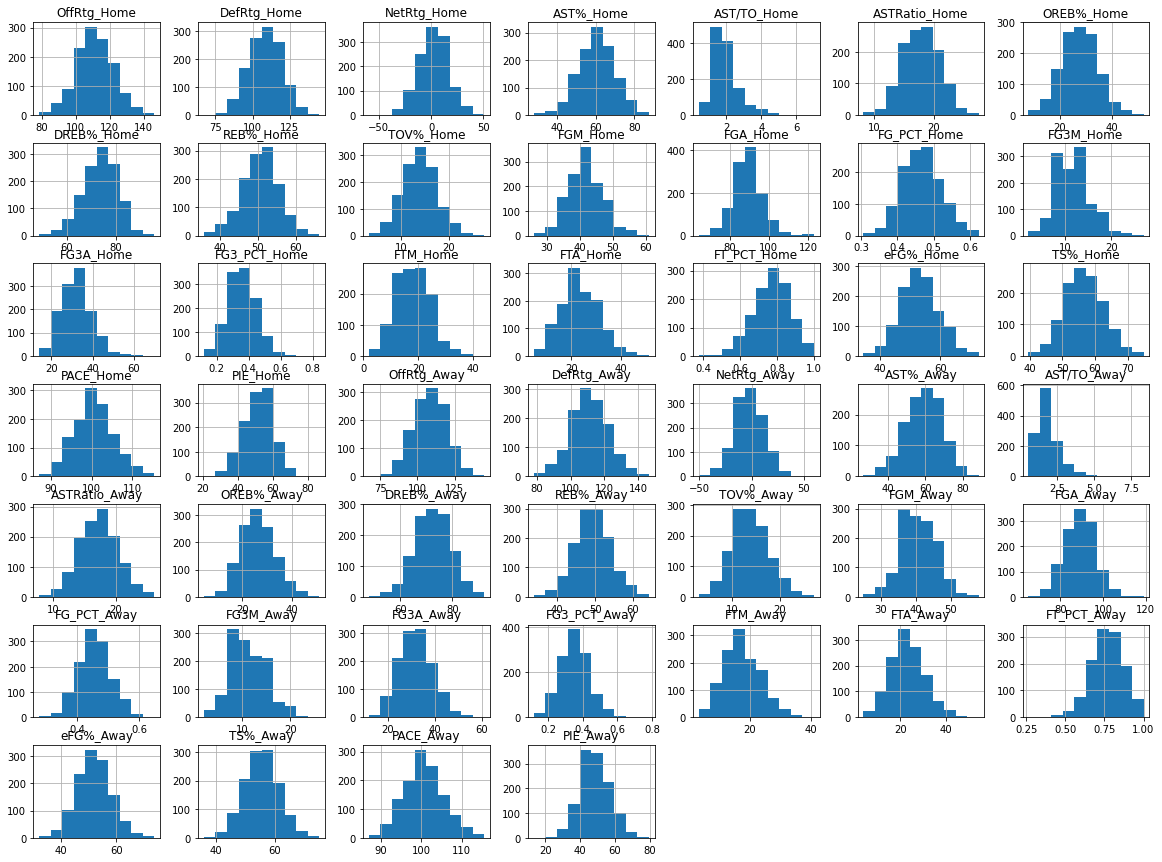

season 19


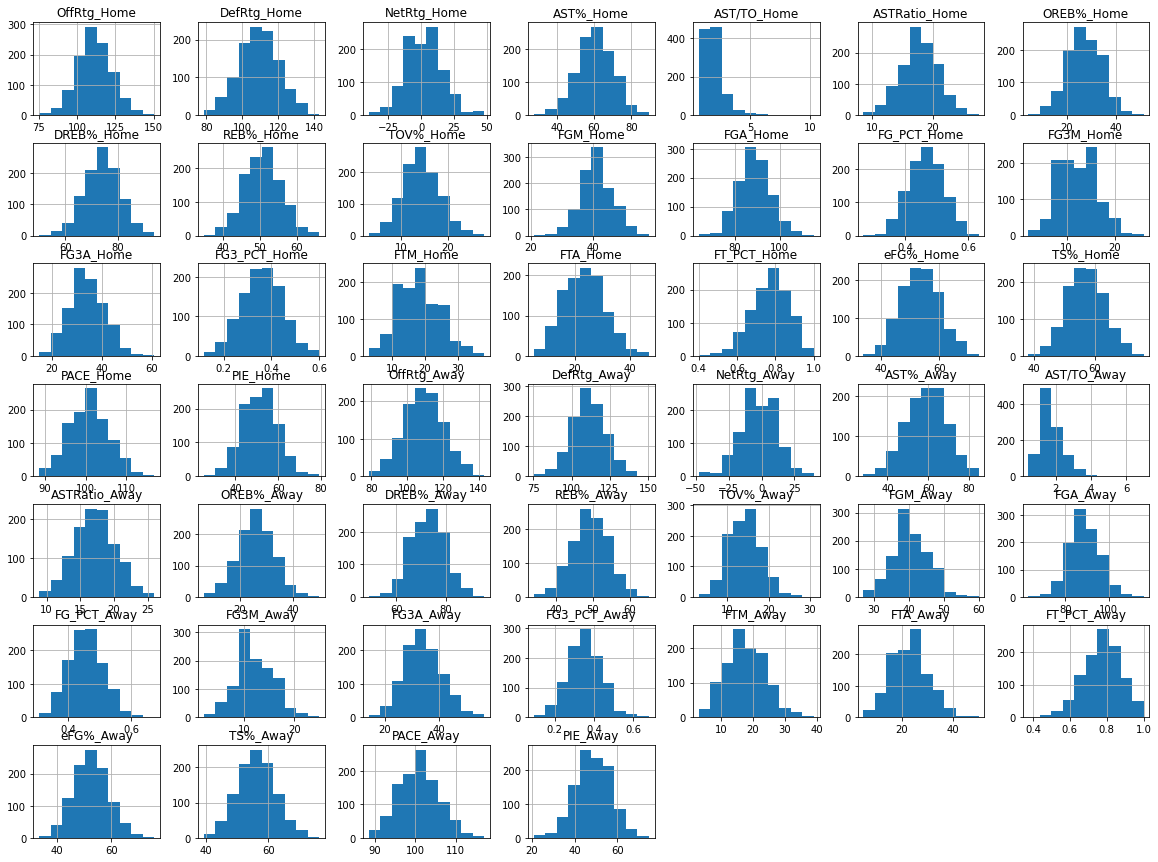

season 20


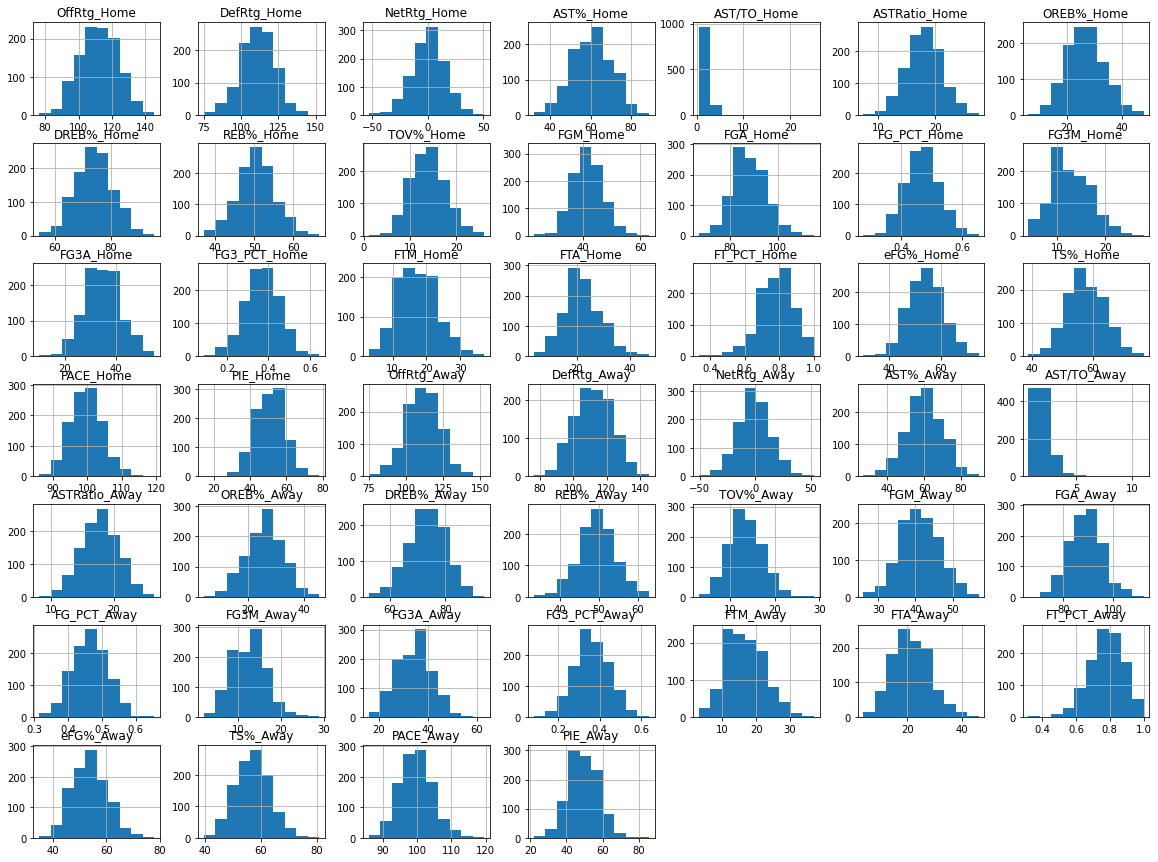

season 21


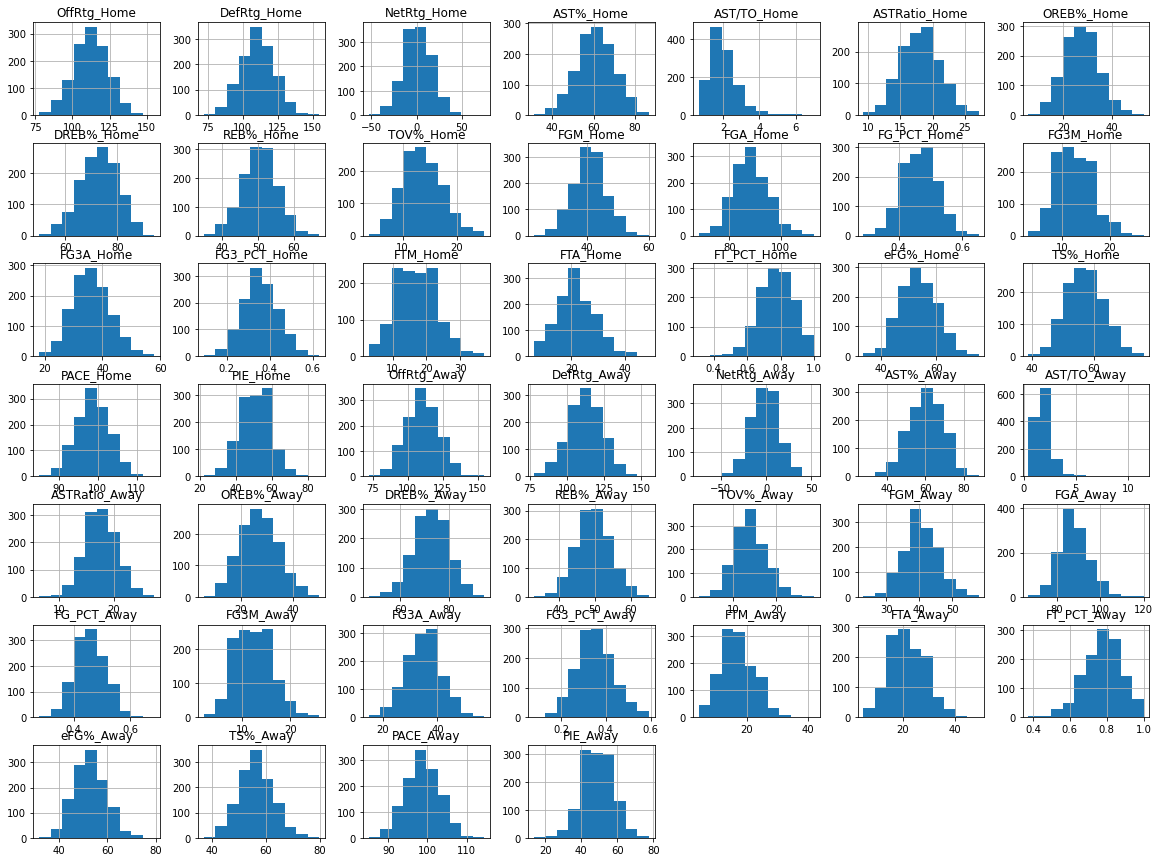

In [12]:
season=[18,19,20,21]
for s in season:
    df_team[column_names][df_team["season"]==str(s)].hist(figsize=(20,15))
    print("season "+str(s))
    plt.show()
    

### Taking a look at each home team's performance in different seasons. 

In [313]:
team_columns=["Winning_Home",'OffRtg_Home', 'DefRtg_Home', 'AST%_Home',
       'AST/TO_Home', 'ASTRatio_Home', 'OREB%_Home', 'DREB%_Home', 'REB%_Home',
       'TOV%_Home', 'FG_PCT_Home', 
        'FG3_PCT_Home', 'FT_PCT_Home',
       'eFG%_Home', 'TS%_Home', 'PACE_Home', 'PIE_Home']

In [285]:
if "Team_Home" not in column_names:
    column_names.append("Team_Home")
#print(column_names)



df_split_teams=df_team[column_names].groupby(["season","Team_Home"]).mean()
df_split_teams

Winning_Home  OffRtg_Home  DefRtg_Home  NetRtg_Home  \
season Team_Home                                                        
18     ATL            0.414634   109.231707   113.053659    -3.809756   
       BKN            0.560976   110.134146   107.900000     2.234146   
       BOS            0.675000   112.455000   106.355000     6.105000   
       CHA            0.609756   112.770732   109.385366     3.390244   
       CHI            0.219512   104.197561   114.017073    -9.817073   
...                        ...          ...          ...          ...   
21     SAC            0.390244   110.117073   114.063415    -3.951220   
       SAS            0.390244   113.265854   113.268293     0.000000   
       TOR            0.585366   114.324390   110.153659     4.173171   
       UTA            0.707317   118.473171   108.429268    10.034146   
       WAS            0.512195   112.263415   113.092683    -0.826829   

                  AST%_Home  AST/TO_Home  ASTRatio_Home  OREB%_Home  \
season Team_Home                                                      
18     ATL        63.553659     1.793659      18.117073   27.804878   
       BKN        58.875610     1.714390      16.909756   28.807317   
       BOS        64.092500     2.193750      19.307500   26.590000   
       CHA        58.092683     2.124634      17.270732   26.890244   
       CHI        56.985366     1.841220      16.812195   24.202439   
...                     ...          ...            ...         ...   
21     SAC        59.456098     1.778780      17.460976   24.802439   
       SAS        64.265854     2.365366      19.434146   28.139024   
       TOR        54.590244     2.037317      16.404878   33.019512   
       UTA        56.190244     1.892195      17.190244   29.924390   
       WAS        61.678049     2.235122      18.682927   24.709756   

                  DREB%_Home  REB%_Home  ...  FG3M_Away  FG3A_Away  \
season Team_Home                         ...                         
18     ATL         72.639024  50.007317  ...  12.829268  36.048780   
       BKN         73.858537  51.631707  ...  10.170732  30.634146   
       BOS         73.097500  50.447500  ...  11.600000  33.725000   
       CHA         74.614634  50.802439  ...  11.463415  33.292683   
       CHI         73.685366  48.343902  ...  12.341463  33.463415   
...                      ...        ...  ...        ...        ...   
21     SAC         71.434146  48.197561  ...  12.414634  33.195122   
       SAS         71.346341  49.529268  ...  11.926829  32.926829   
       TOR         71.492683  51.385366  ...  12.365854  33.682927   
       UTA         74.392683  53.004878  ...  12.000000  33.536585   
       WAS         73.453659  49.770732  ...  10.878049  31.146341   

                  FG3_PCT_Away   FTM_Away   FTA_Away  FT_PCT_Away  eFG%_Away  \
season Team_Home                                                               
18     ATL            0.355780  21.902439  28.951220     0.768415  53.407317   
       BKN            0.334049  18.000000  23.365854     0.771902  51.048780   
       BOS            0.342375  17.325000  22.825000     0.761125  50.910000   
       CHA            0.346146  16.682927  21.560976     0.768854  52.326829   
       CHI            0.364366  15.585366  21.024390     0.750976  55.319512   
...                        ...        ...        ...          ...        ...   
21     SAC            0.372146  16.926829  21.219512     0.800268  54.404878   
       SAS            0.359976  16.609756  21.219512     0.784732  53.614634   
       TOR            0.365878  18.048780  22.634146     0.789488  53.107317   
       UTA            0.356244  15.048780  19.634146     0.771024  51.136585   
       WAS            0.347585  18.780488  23.414634     0.795585  52.556098   

                   TS%_Away   PACE_Away   PIE_Away  
season Team_Home                                    
18     ATL        57.375610  104.409024  52.480488  
       BKN        54.685366  101.

In [287]:
#set season as index
df_split_teams = df_split_teams.reset_index(level=0) 
df_split_teams


,season,Winning_Home,OffRtg_Home,DefRtg_Home,NetRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,...,FG3M_Away,FG3A_Away,FG3_PCT_Away,FTM_Away,FTA_Away,FT_PCT_Away,eFG%_Away,TS%_Away,PACE_Away,PIE_Away
Team_Home,,,,,,,,,,,,,,,,,,,,,
ATL,18,0.414634,109.231707,113.053659,-3.809756,63.553659,1.793659,18.117073,27.804878,72.639024,...,12.829268,36.048780,0.355780,21.902439,28.951220,0.768415,53.407317,57.375610,104.409024,52.480488
BKN,18,0.560976,110.134146,107.900000,2.234146,58.875610,1.714390,16.909756,28.807317,73.858537,...,10.170732,30.634146,0.334049,18.000000,23.365854,0.771902,51.048780,54.685366,101.847073,49.119512
BOS,18,0.675000,112.455000,106.355000,6.105000,64.092500,2.193750,19.307500,26.590000,73.097500,...,11.600000,33.725000,0.342375,17.325000,22.825000,0.761125,50.910000,54.475000,101.020500,45.835000
CHA,18,0.609756,112.770732,109.385366,3.390244,58.092683,2.124634,17.270732,26.890244,74.614634,...,11.463415,33.292683,0.346146,16.682927,21.560976,0.768854,52.326829,55.760976,99.527073,48.695122
CHI,18,0.219512,104.197561,114.017073,-9.817073,56.985366,1.841220,16.812195,24.202439,73.685366,...,12.341463,33.463415,0.364366,15.585366,21.024390,0.750976,55.319512,58.080488,98.715122,55.587805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAC,21,0.390244,110.117073,114.063415,-3.951220,59.456098,1.778780,17.460976,24.802439,71.434146,...,12.414634,33.195122,0.372146,16.926829,21.219512,0.800268,54.404878,57.809756,99.911951,52.007317
SAS,21,0.390244,113.265854,113.268293,0.000000,64.265854,2.365366,19.434146,28.139024,71.346341,...,11.926829,32.926829,0.359976,16.609756,21.219512,0.784732,53.614634,56.900000,100.107805,49.092683
TOR,21,0.585366,114.324390,110.153659,4.173171,54.590244,2.037317,16.404878,33.019512,71.492683,...,12.365854,33.682927,0.365878,18.048780,22.634146,0.789488,53.107317,57.117073,96.369512,49.743902


In [273]:
df_split_teams.index

Index(['18', '18', '18', '18', '18', '18', '18', '18', '18', '18',
       ...
       '21', '21', '21', '21', '21', '21', '21', '21', '21', '21'],
      dtype='object', name='season', length=120)

In [314]:
df_18=df_split_teams[df_split_teams.season==str(season[0])]
df_18=df_18[team_columns]
df_18

,Winning_Home,OffRtg_Home,DefRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,FG_PCT_Home,FG3_PCT_Home,FT_PCT_Home,eFG%_Home,TS%_Home,PACE_Home,PIE_Home
Team_Home,,,,,,,,,,,,,,,,,
ATL,0.414634,109.231707,113.053659,63.553659,1.793659,18.117073,27.804878,72.639024,50.007317,15.202439,0.454366,0.348000,0.766341,52.526829,56.082927,104.409024,47.519512
BKN,0.560976,110.134146,107.900000,58.875610,1.714390,16.909756,28.807317,73.858537,51.631707,14.797561,0.458122,0.356537,0.748707,52.946341,56.524390,101.847073,50.880488
BOS,0.675000,112.455000,106.355000,64.092500,2.193750,19.307500,26.590000,73.097500,50.447500,13.292500,0.474900,0.365300,0.814575,54.475000,57.695000,101.020500,54.165000
CHA,0.609756,112.770732,109.385366,58.092683,2.124634,17.270732,26.890244,74.614634,50.802439,12.351220,0.460268,0.362171,0.799220,52.763415,56.912195,99.527073,51.304878
CHI,0.219512,104.197561,114.017073,56.985366,1.841220,16.812195,24.202439,73.685366,48.343902,13.536585,0.449585,0.337927,0.782732,49.919512,53.448780,98.715122,44.412195
CLE,0.317073,107.639024,115.409756,54.212195,1.679512,15.775610,29.041463,74.095122,50.407317,14.390244,0.445805,0.356537,0.800537,50.804878,54.485366,96.932683,44.285366
DAL,0.585366,110.907317,108.917073,61.129268,1.808537,17.187805,29.126829,73.373171,51.297561,14.524390,0.453463,0.344000,0.742098,52.658537,56.509756,99.122195,52.343902
DEN,0.829268,116.156098,105.643902,65.121951,2.343415,19.878049,31.146341,75.431707,53.687805,13.190244,0.486195,0.355293,0.774488,54.826829,57.968293,98.304878,56.426829
DET,0.634146,109.856098,107.351220,58.914634,1.871707,16.917073,30.563415,74.504878,52.070732,14.004878,0.449829,0.344707,0.745756,51.553659,55.014634,97.713659,50.202439


In [315]:
df_19=df_split_teams[df_split_teams.season==str(season[1])]
df_19=df_19[team_columns]
df_19

,Winning_Home,OffRtg_Home,DefRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,FG_PCT_Home,FG3_PCT_Home,FT_PCT_Home,eFG%_Home,TS%_Home,PACE_Home,PIE_Home
Team_Home,,,,,,,,,,,,,,,,,
ATL,0.411765,109.517647,111.952941,58.882353,1.641471,17.076471,27.623529,72.297059,49.867647,15.288235,0.459618,0.344735,0.785000,52.517647,56.420588,103.231176,47.597059
BKN,0.555556,109.205556,107.458333,60.680556,1.658611,17.344444,27.752778,75.000000,52.058333,15.866667,0.462167,0.363167,0.724778,53.602778,56.747222,102.383333,51.261111
BOS,0.722222,115.150000,106.875000,57.647222,1.920833,17.316667,28.355556,73.486111,51.152778,13.238889,0.469833,0.378417,0.809750,54.219444,58.191667,99.592222,54.672222
CHA,0.322581,107.335484,112.596774,64.500000,1.762258,17.870968,28.903226,70.945161,49.219355,15.612903,0.442323,0.353839,0.744258,51.329032,54.748387,96.361290,46.170968
CHI,0.411765,105.197059,106.847059,59.714706,1.523824,16.864706,27.497059,73.167647,49.144118,16.070588,0.445206,0.349971,0.746882,51.332353,54.426471,100.823529,46.932353
CLE,0.305556,108.850000,115.186111,58.391667,1.612500,17.277778,30.080556,75.366667,52.138889,16.241667,0.463639,0.365528,0.770167,53.072222,56.161111,98.913889,46.422222
DAL,0.526316,115.821053,110.976316,59.123684,2.188158,17.581579,26.863158,74.742105,50.728947,12.578947,0.462868,0.370000,0.778289,54.705263,58.323684,100.044474,52.076316
DEN,0.702703,113.675676,109.124324,65.189189,2.436486,19.789189,29.124324,73.564865,51.548649,13.318919,0.480162,0.344757,0.752081,53.864865,56.927027,97.518378,53.270270
DET,0.333333,110.812121,112.787879,61.184848,1.800000,17.915152,28.054545,71.930303,49.842424,15.309091,0.470212,0.377121,0.737455,54.190909,57.236364,97.497879,48.193939


In [291]:
len(df_19.columns)

35

In [319]:
team_names=df_19.index.values.tolist()

In [317]:
df_team_diff=np.zeros((len(df_19),len(df_19.columns)))
for i in range (len(df_19)):
    for k in range (len(df_19.columns)):
        
        df_team_diff[i,k]=df_19.iloc[i,k]-df_18.iloc[i,k]

#Take only % difference columns.
df_team_diff = pd.DataFrame(df_team_diff, columns = team_columns)

Teams=df_19.index.values.tolist()
df_team_diff["Teams"]=Teams

df_team_diff

,Winning_Home,OffRtg_Home,DefRtg_Home,AST%_Home,AST/TO_Home,ASTRatio_Home,OREB%_Home,DREB%_Home,REB%_Home,TOV%_Home,FG_PCT_Home,FG3_PCT_Home,FT_PCT_Home,eFG%_Home,TS%_Home,PACE_Home,PIE_Home,Teams
0,-0.002869,0.285940,-1.100717,-4.671306,-0.152188,-1.040603,-0.181349,-0.341966,-0.139670,0.085796,0.005252,-0.003265,0.018659,-0.009182,0.337661,-1.177848,0.077547,ATL
1,-0.005420,-0.928591,-0.441667,1.804946,-0.055779,0.434688,-1.054539,1.141463,0.426626,1.069106,0.004045,0.006630,-0.023930,0.656436,0.222832,0.536260,0.380623,BKN
2,0.047222,2.695000,0.520000,-6.445278,-0.272917,-1.990833,1.765556,0.388611,0.705278,-0.053611,-0.005067,0.013117,-0.004825,-0.255556,0.496667,-1.428278,0.507222,BOS
3,-0.287175,-5.435248,3.211408,6.407317,-0.362376,0.600236,2.012982,-3.669473,-1.583084,3.261684,-0.017946,-0.008332,-0.054961,-1.434382,-2.163808,-3.165783,-5.133910,CHA
4,0.192253,0.999498,-7.170014,2.729340,-0.317396,0.052511,3.294620,-0.517719,0.800215,2.534003,-0.004379,0.012044,-0.035849,1.412841,0.977690,2.108407,2.520158,CHI
5,-0.011518,1.210976,-0.223645,4.179472,-0.067012,1.502168,1.039092,1.271545,1.731572,1.851423,0.017834,0.008991,-0.030370,2.267344,1.675745,1.981206,2.136856,CLE
6,-0.059050,4.913736,2.059243,-2.005584,0.379621,0.393774,-2.263671,1.368935,-0.568614,-1.945443,0.009405,0.026000,0.036192,2.046727,1.813928,0.922279,-0.267587,DAL
7,-0.126566,-2.480422,3.480422,0.067238,0.093072,-0.088860,-2.022017,-1.866842,-2.139156,0.128675,-0.006033,-0.010536,-0.022407,-0.961964,-1.041266,-0.786500,-3.156559,DEN
8,-0.300813,0.956024,5.436659,2.270214,-0.071707,0.998078,-2.508869,-2.574575,-2.228307,1.304213,0.020383,0.032414,-0.008302,2.637251,2.221729,-0.215780,-2.008500,DET
9,-0.489706,-10.296029,4.542059,-0.743529,-0.394809,-2.406324,-1.141471,0.004559,-2.435588,1.301029,-0.051690,-0.044904,0.026285,-6.435588,-5.011618,-0.905662,-7.871324,GSW


ATL


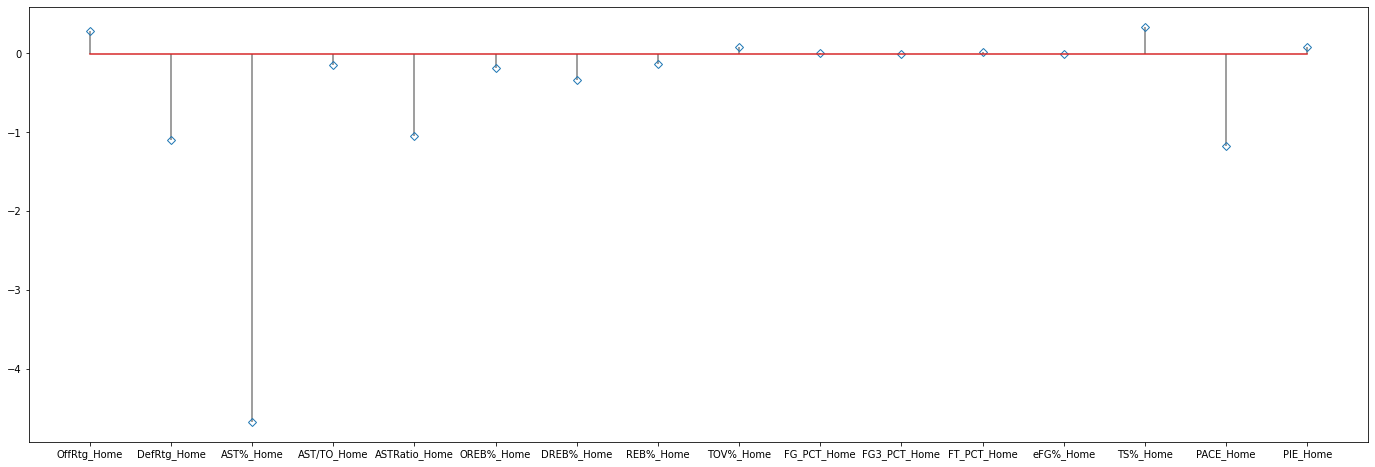

BKN


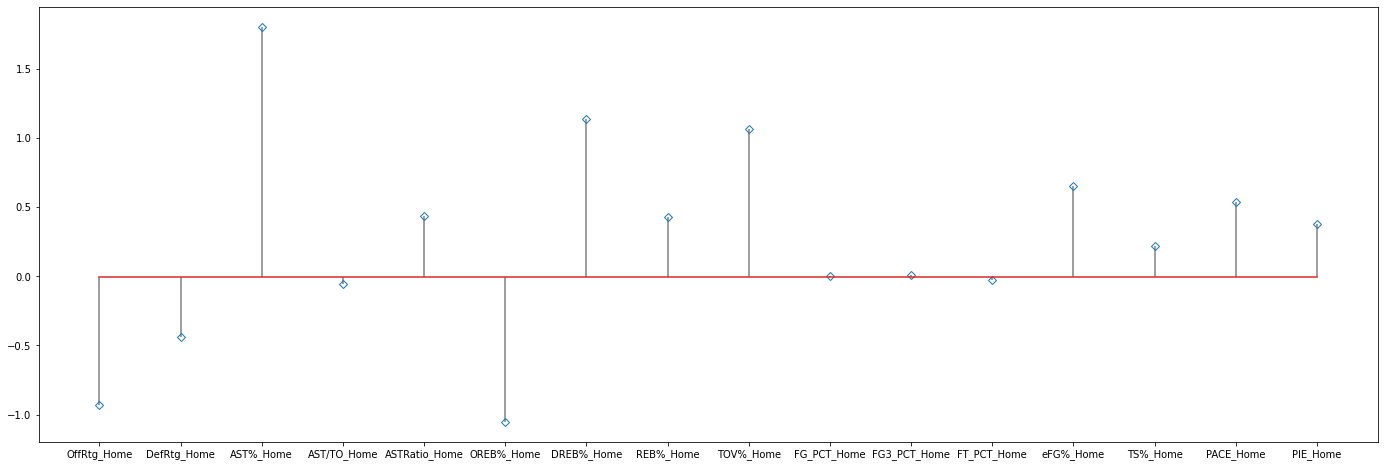

BOS


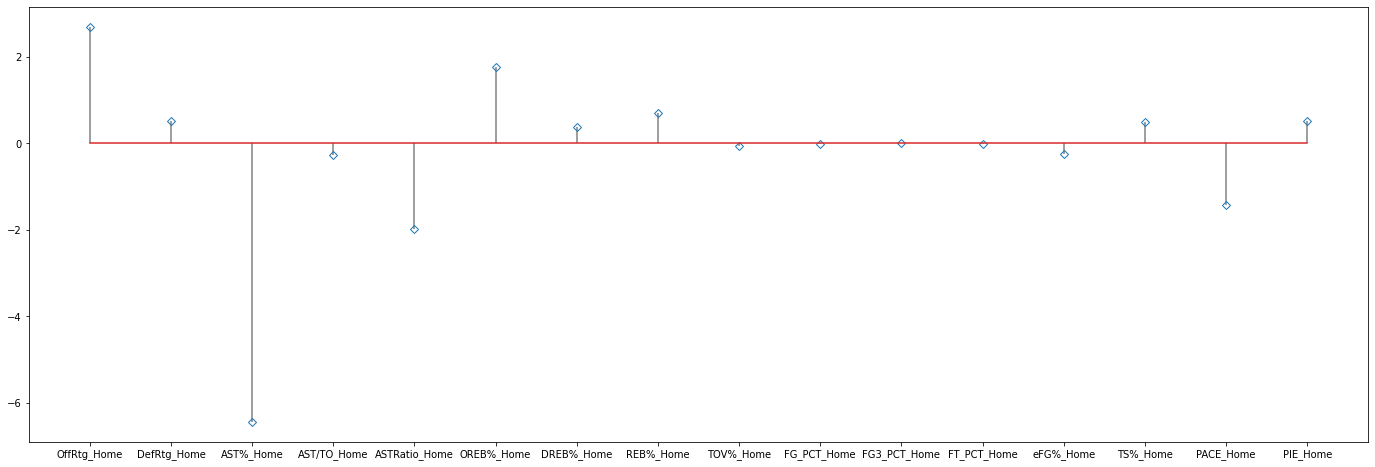

CHA


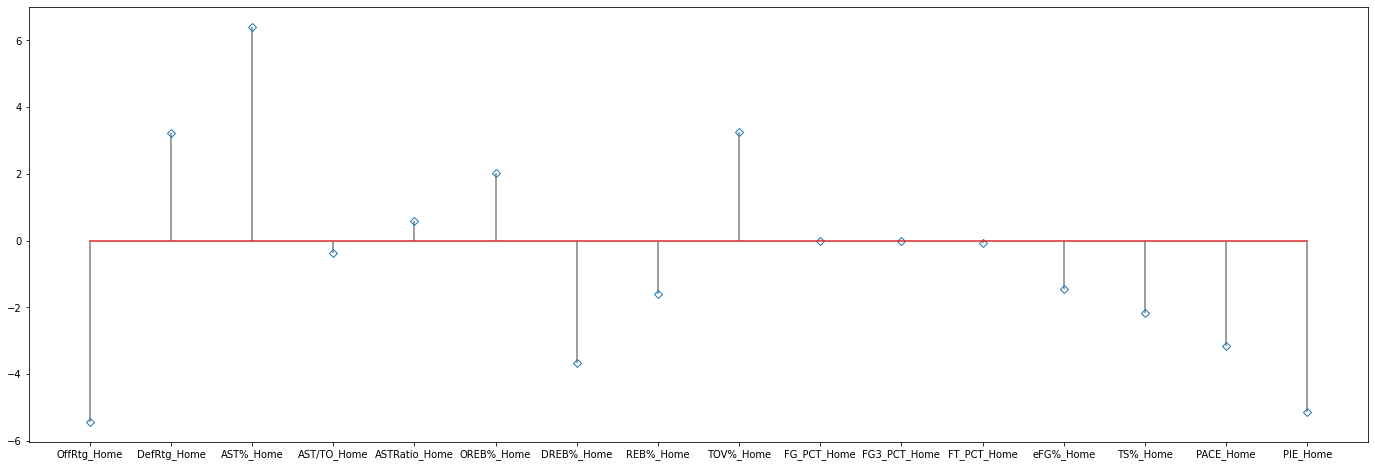

CHI


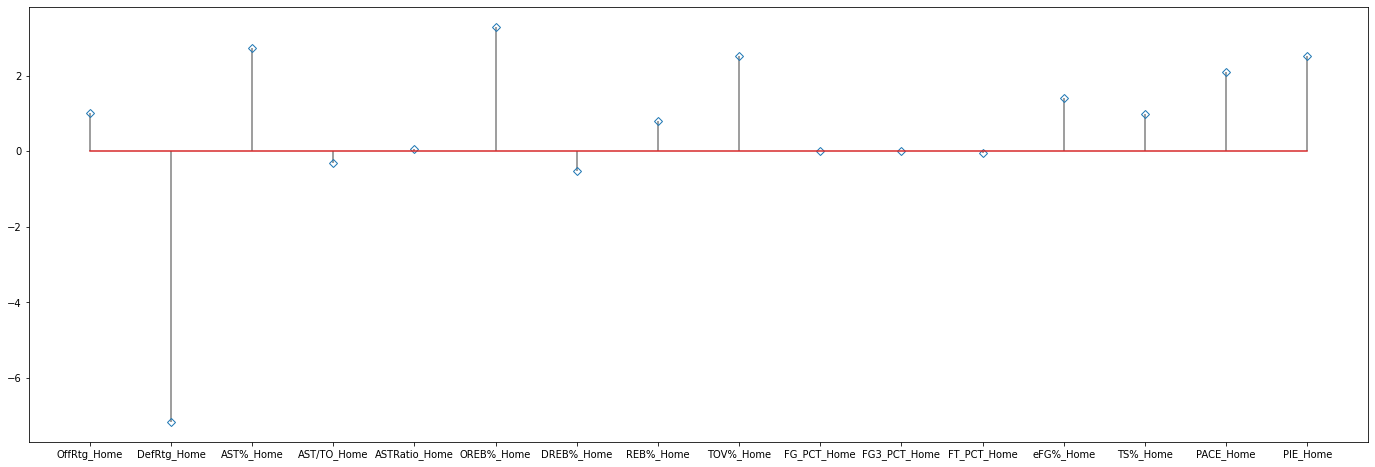

CLE


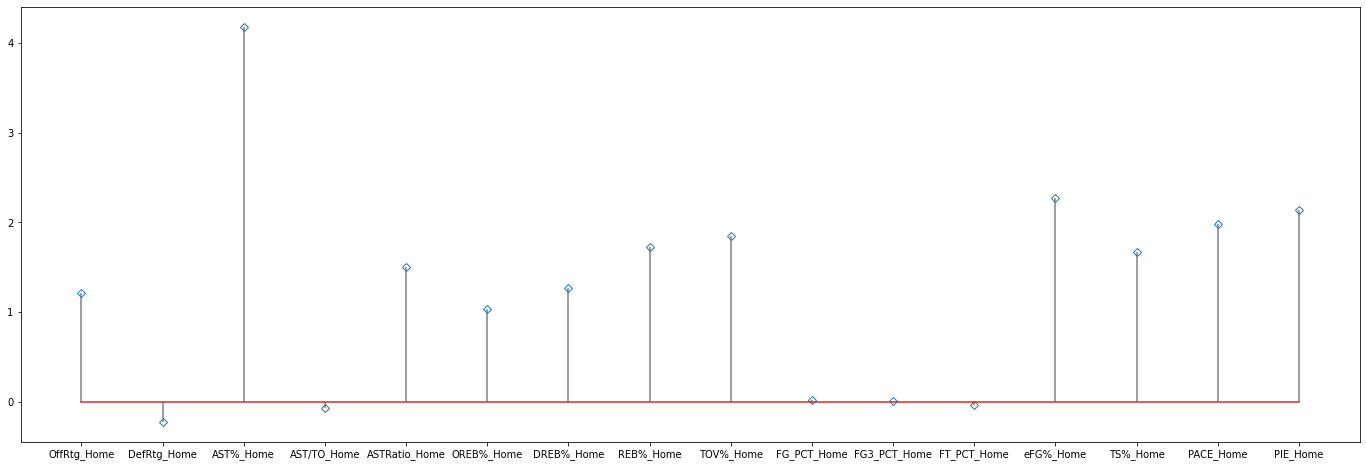

DAL


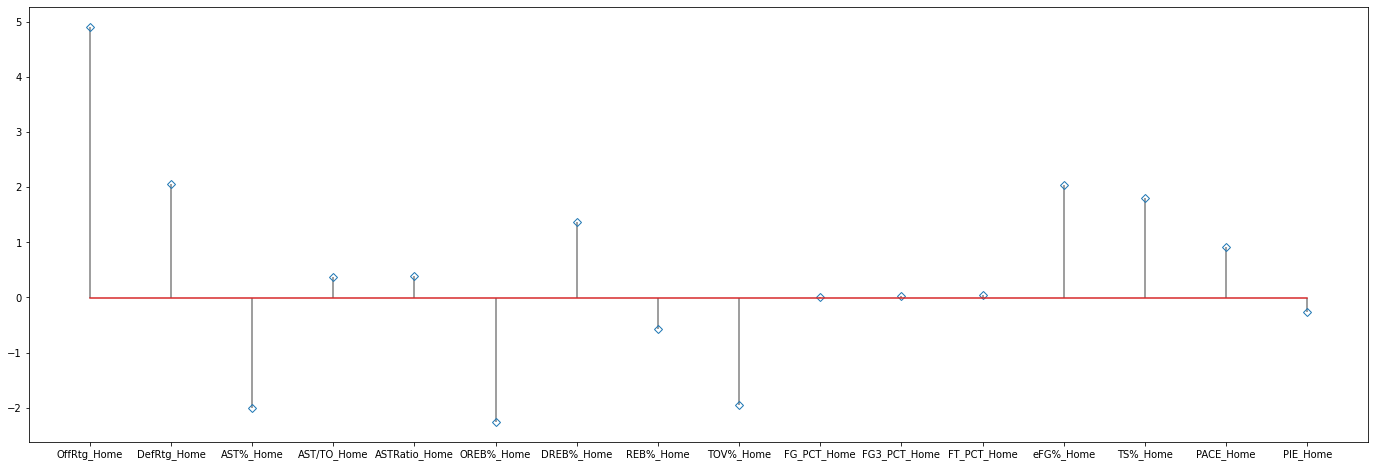

DEN


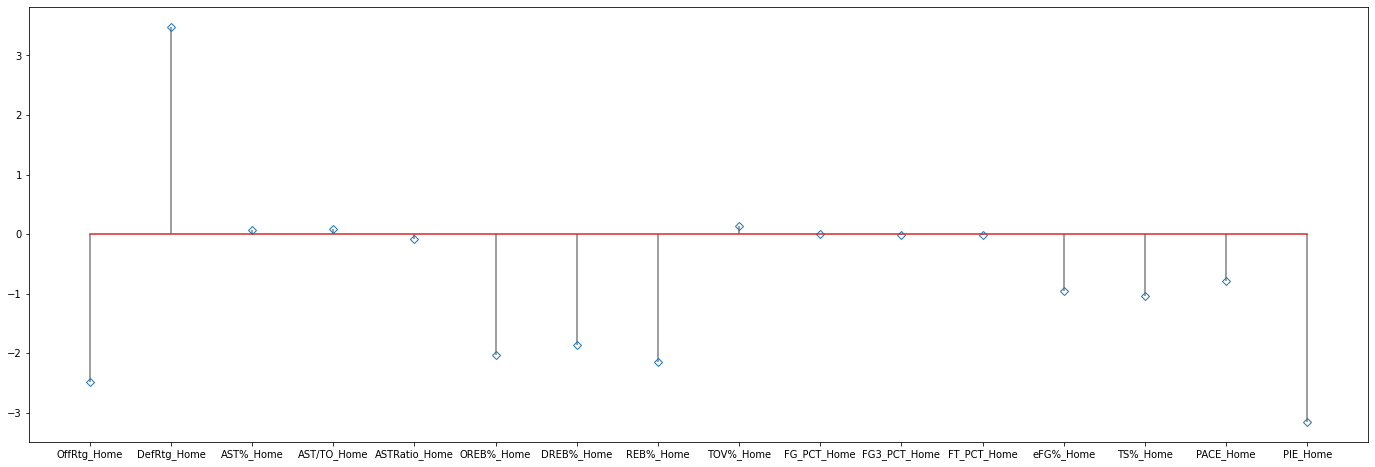

DET


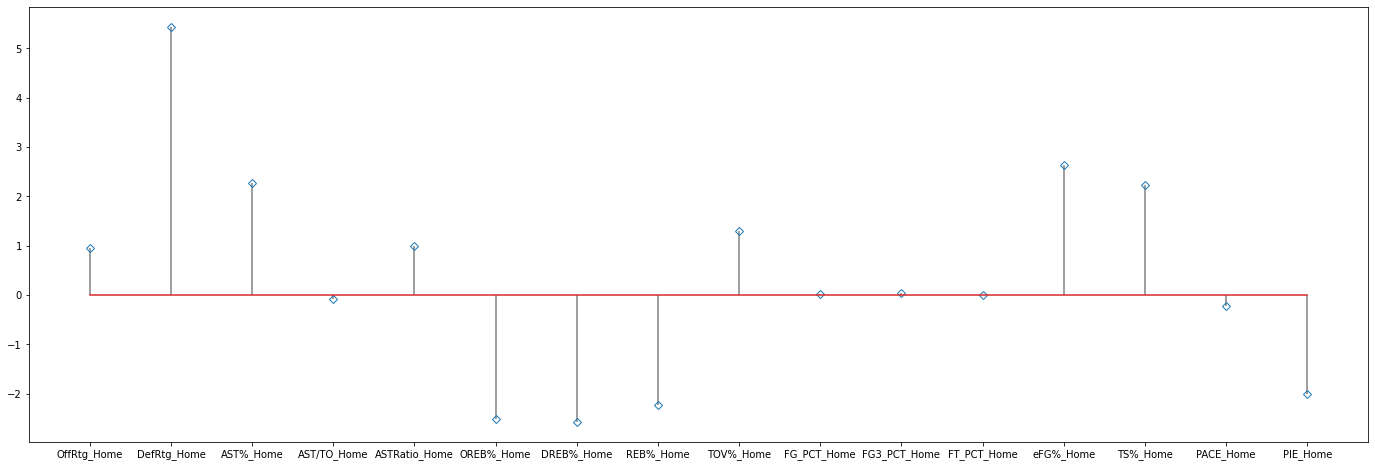

GSW


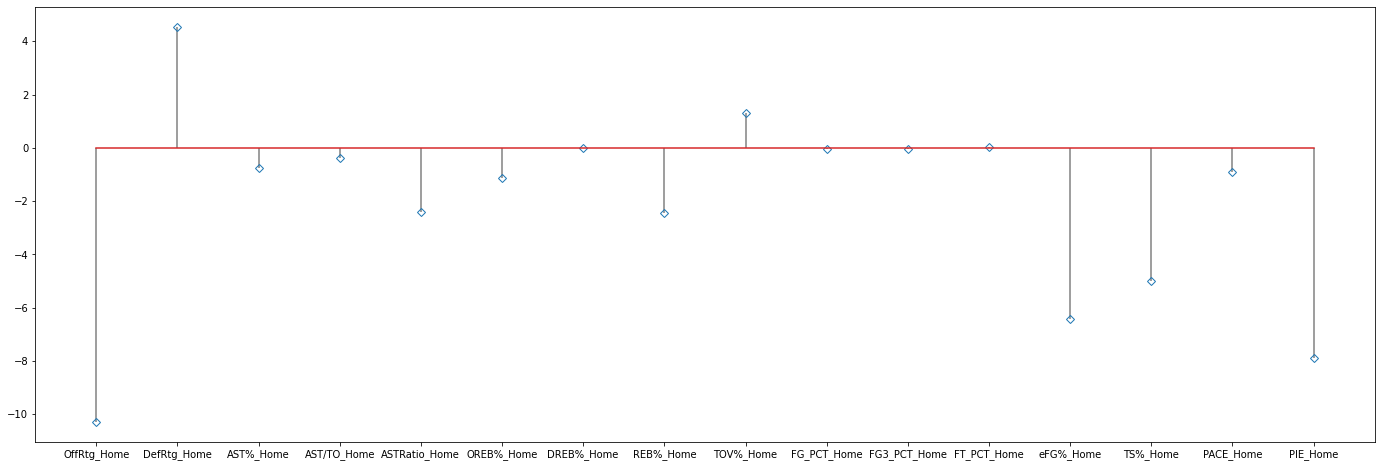

HOU


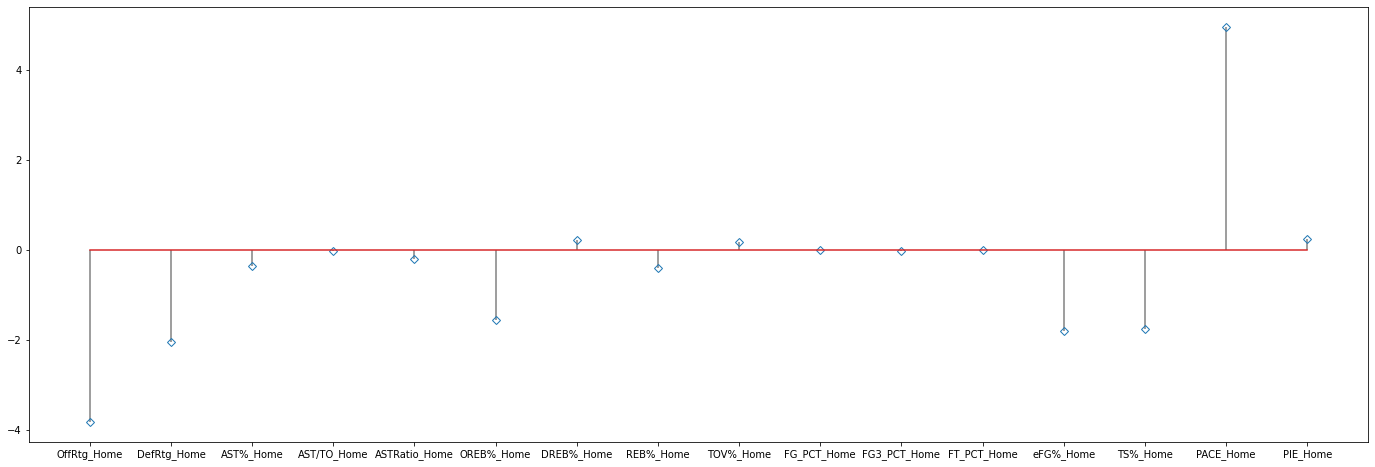

IND


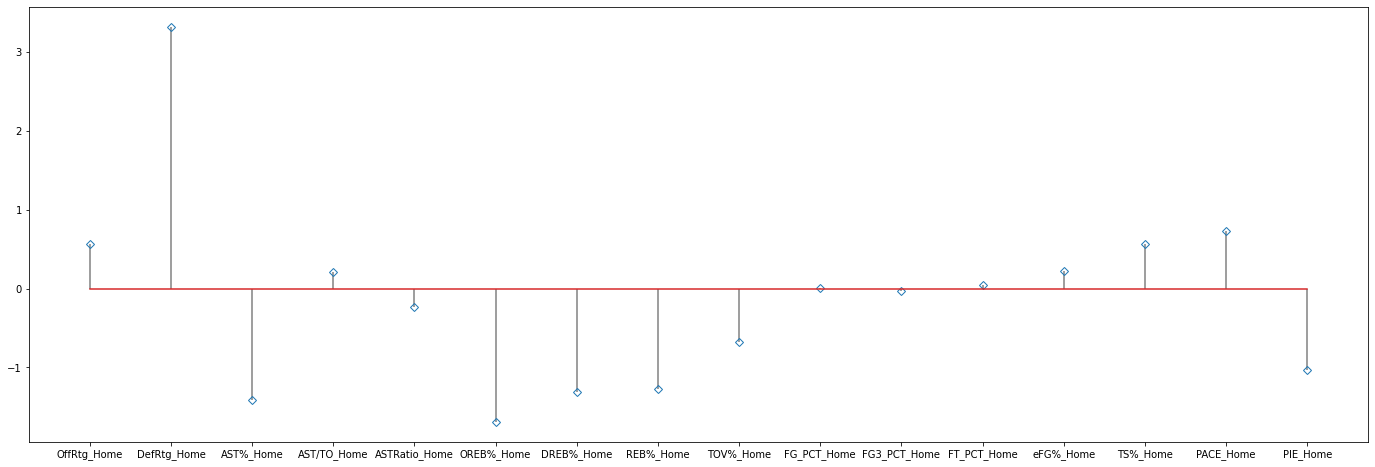

LAC


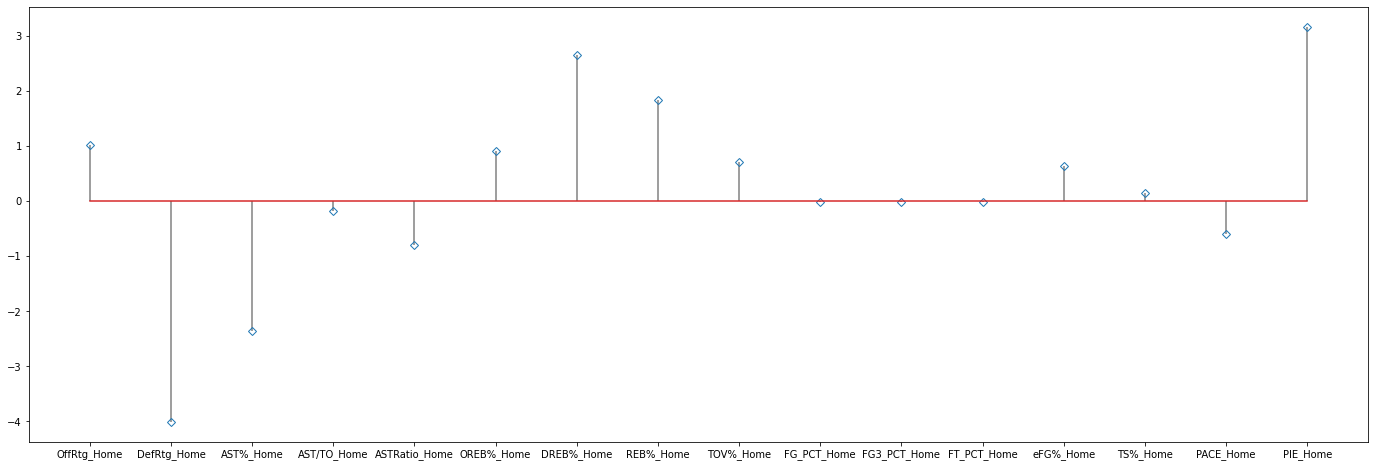

LAL


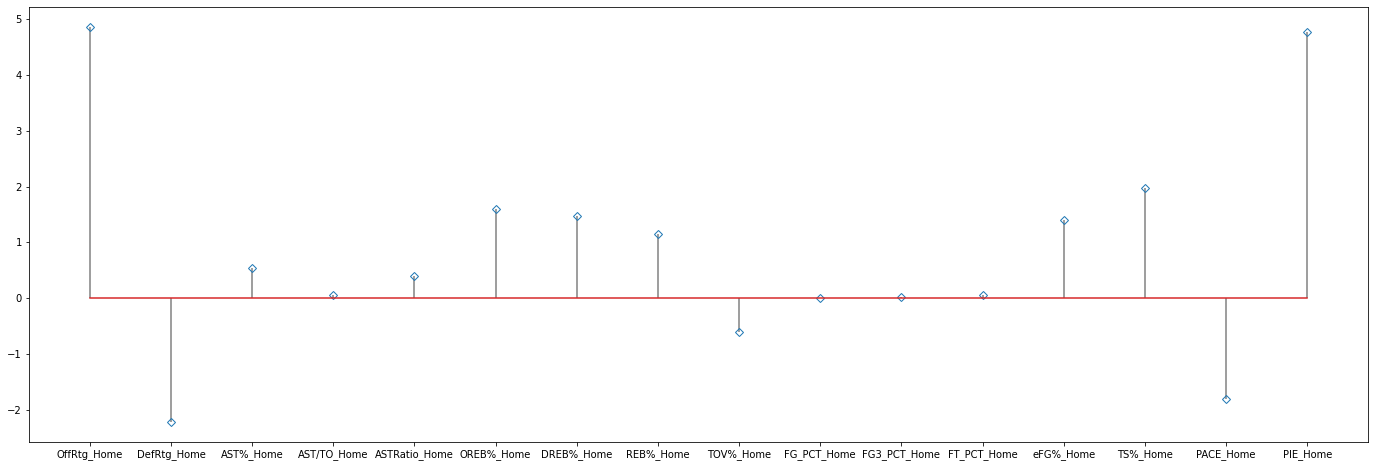

MEM


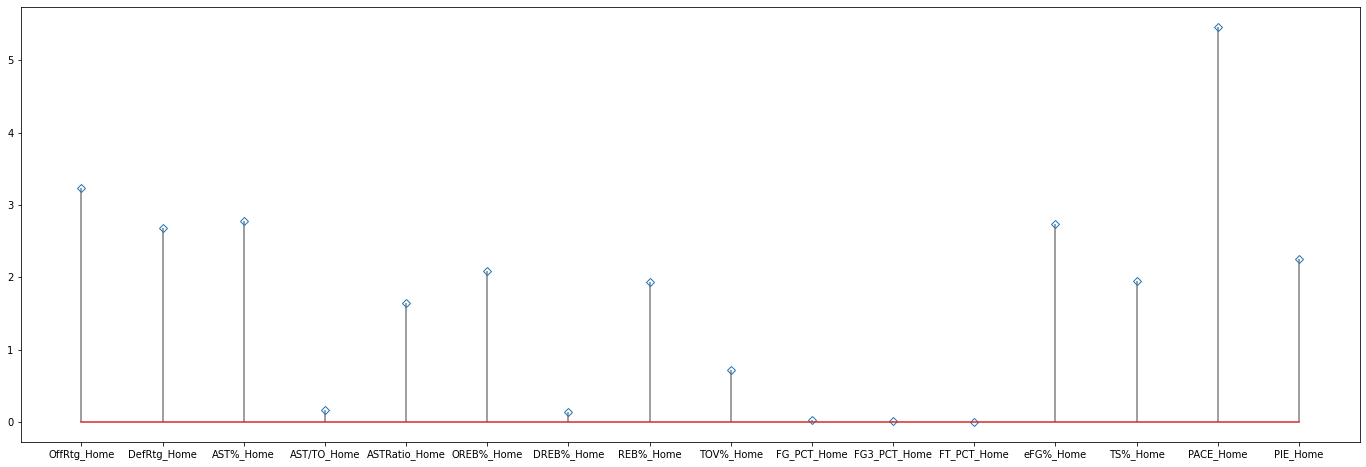

MIA


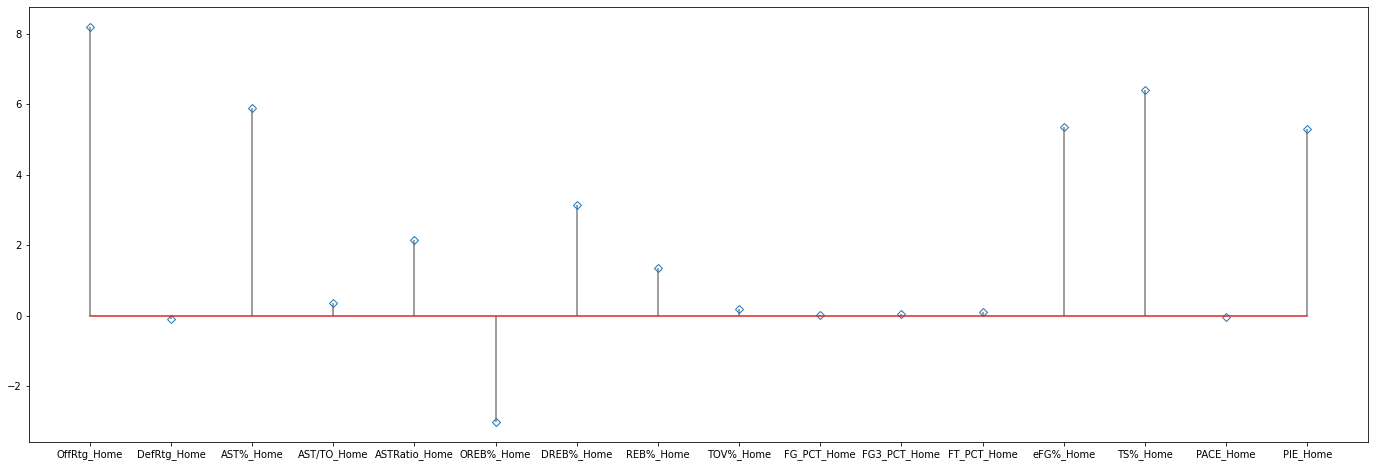

MIL


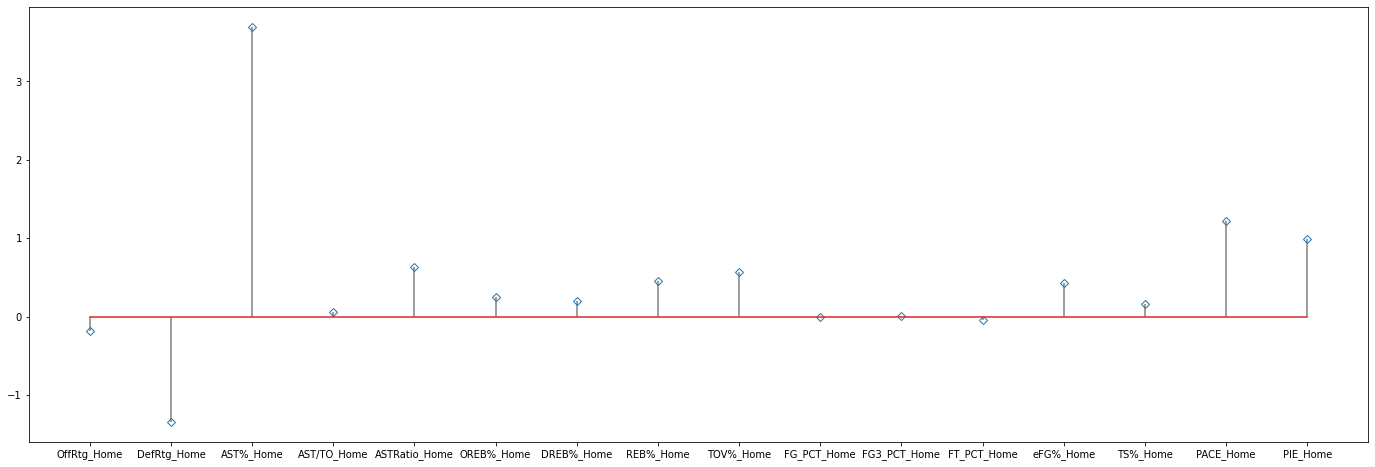

MIN


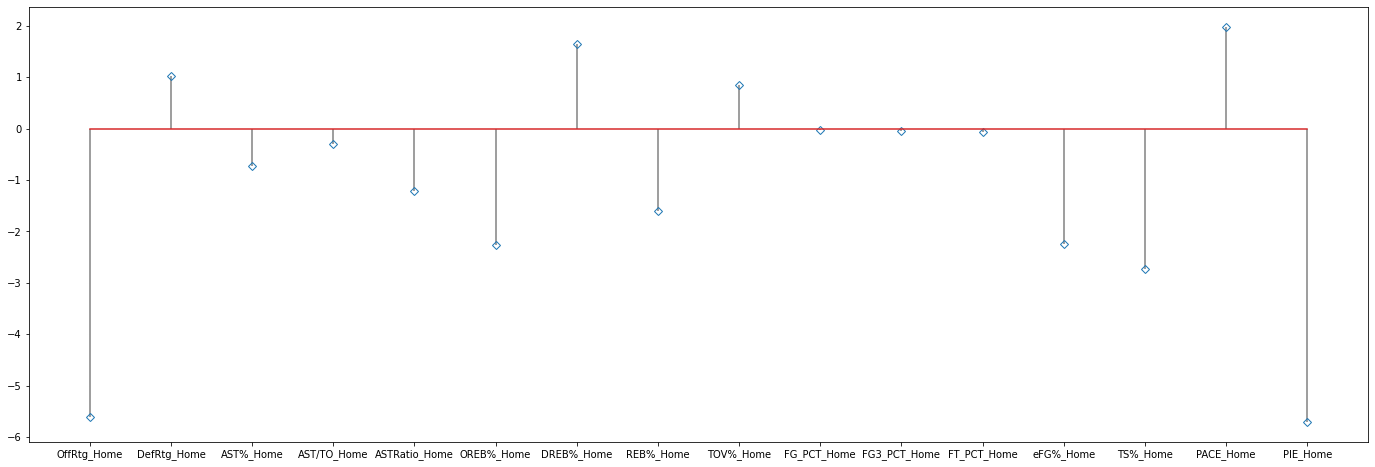

NOP


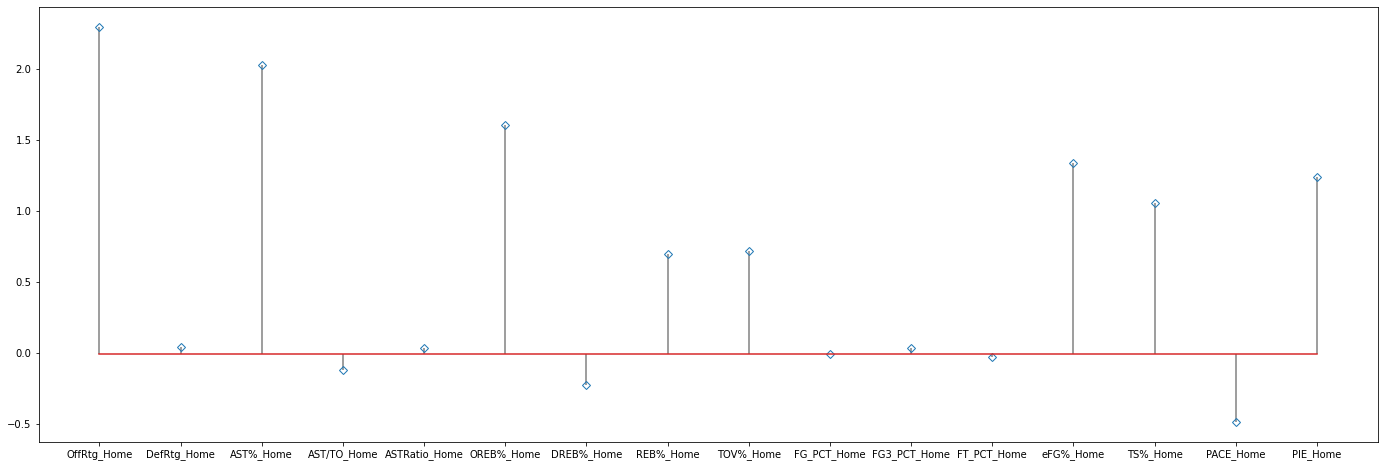

NYK


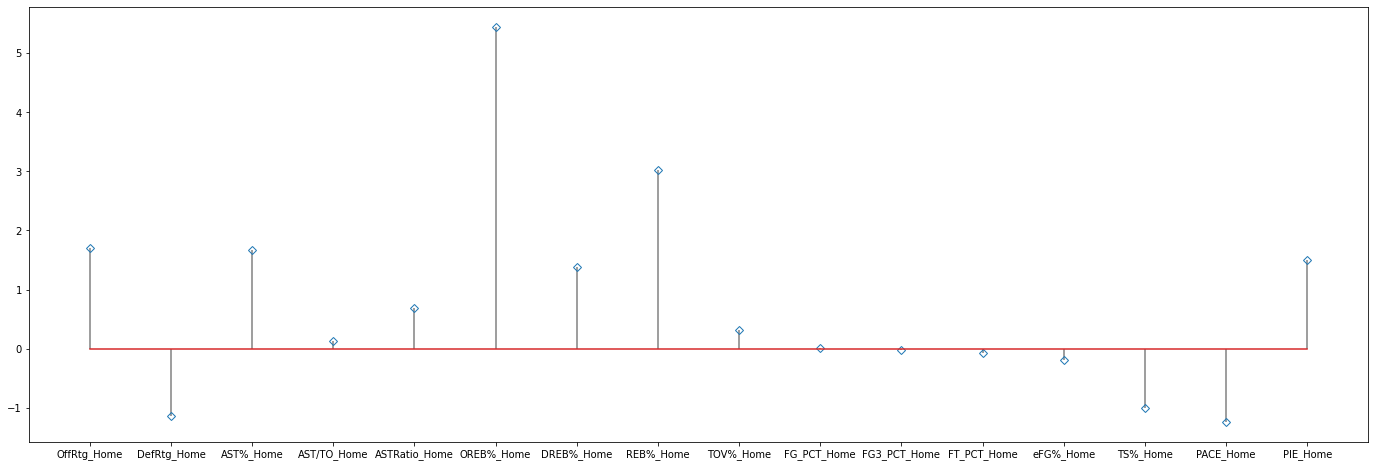

OKC


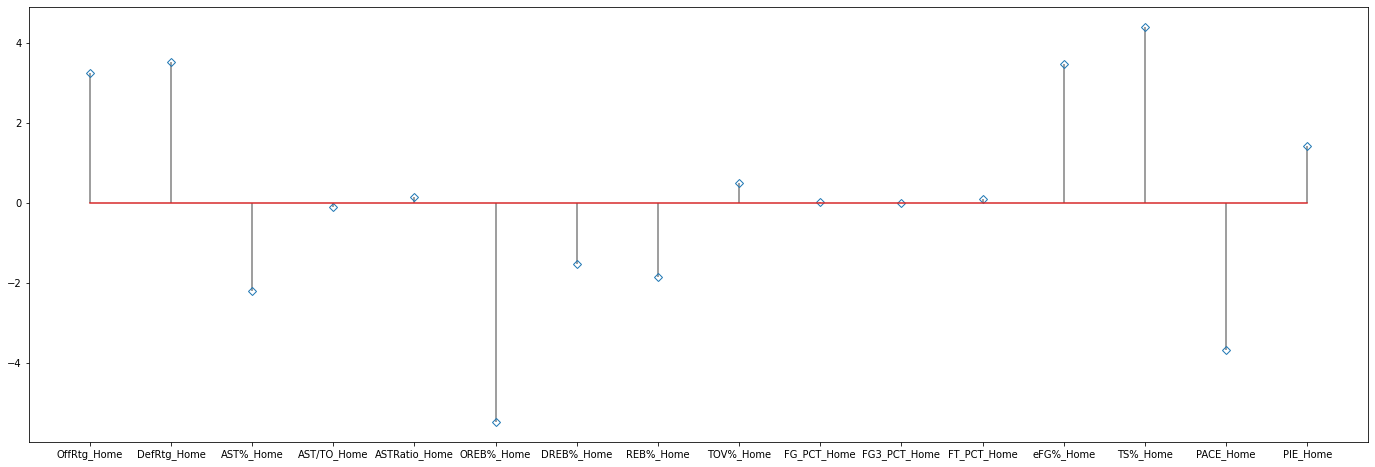

ORL


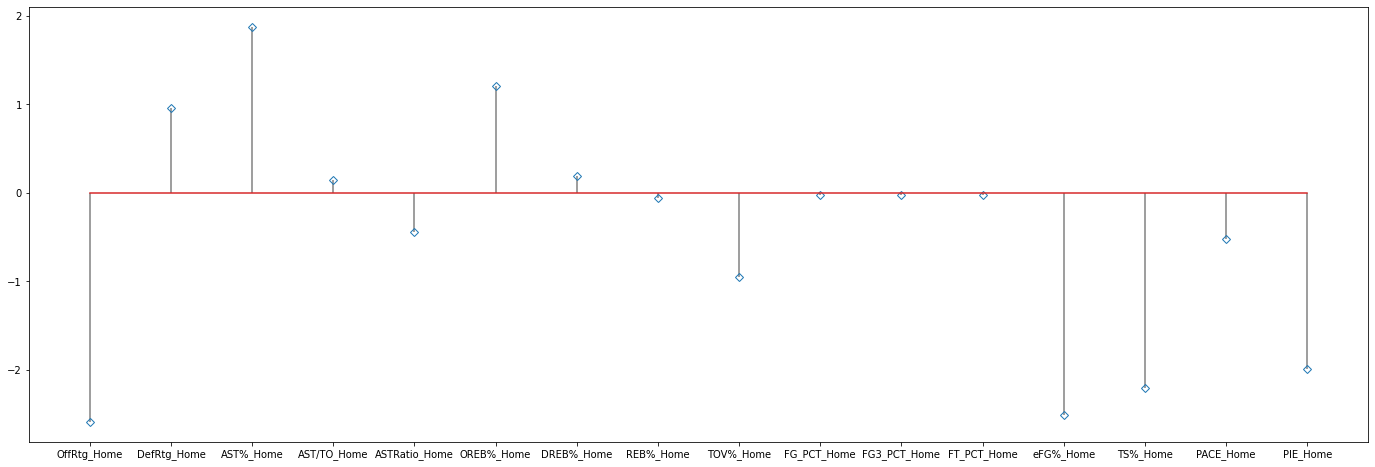

PHI


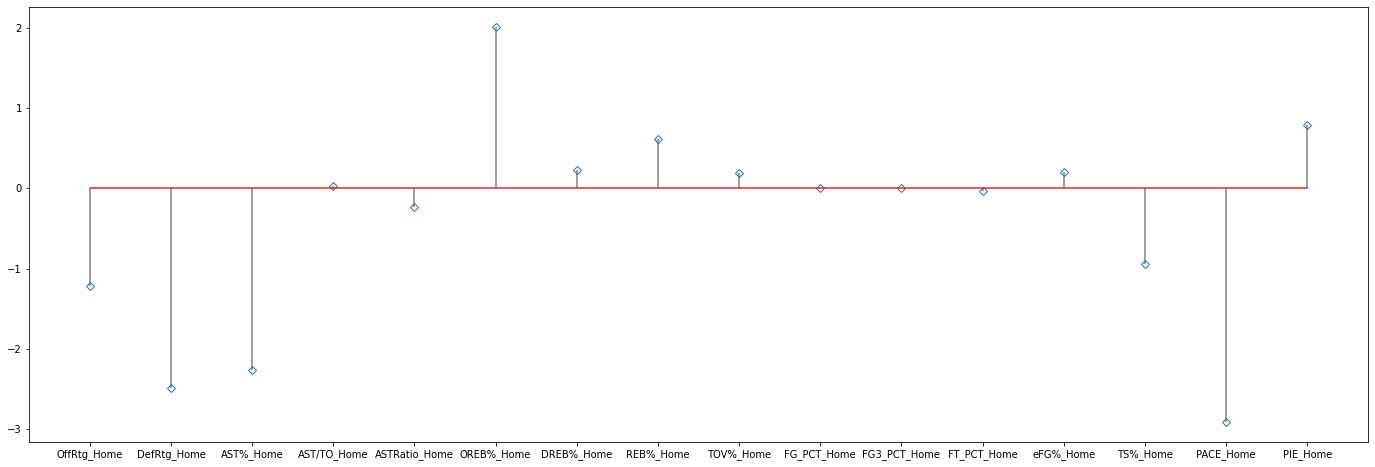

PHX


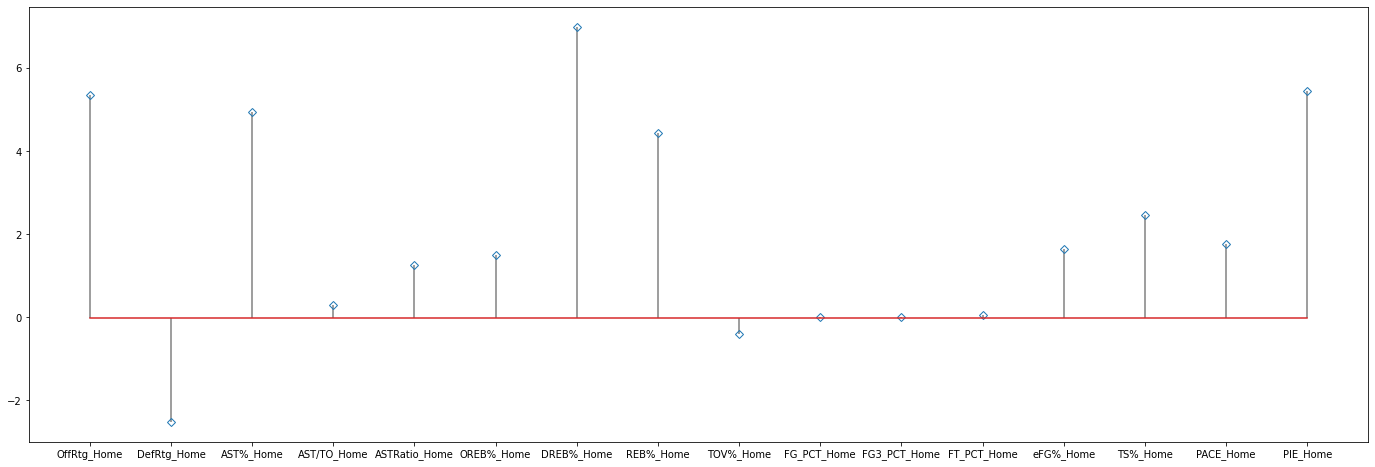

POR


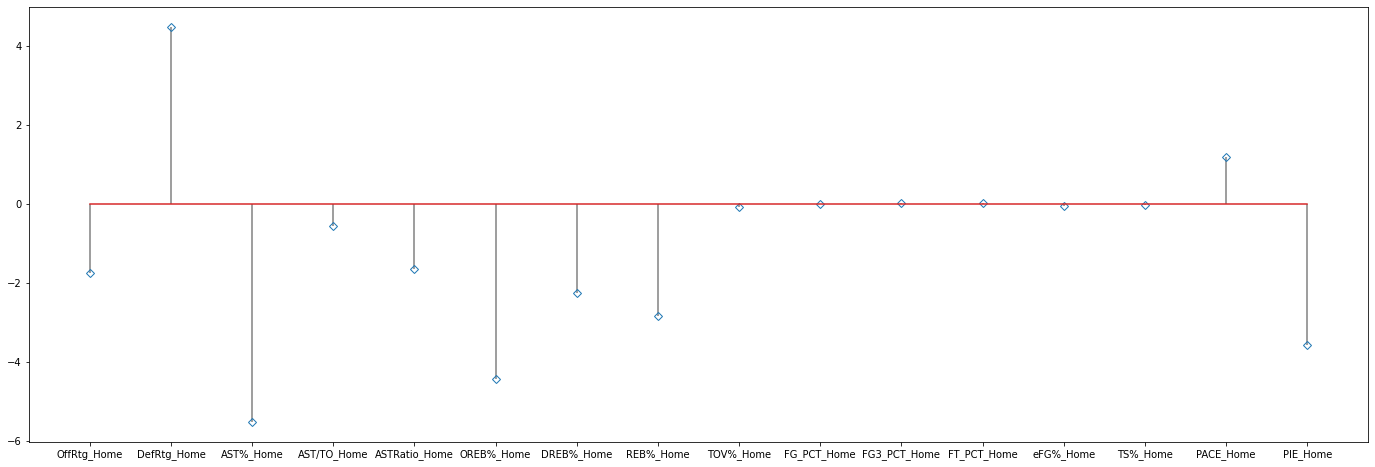

SAC


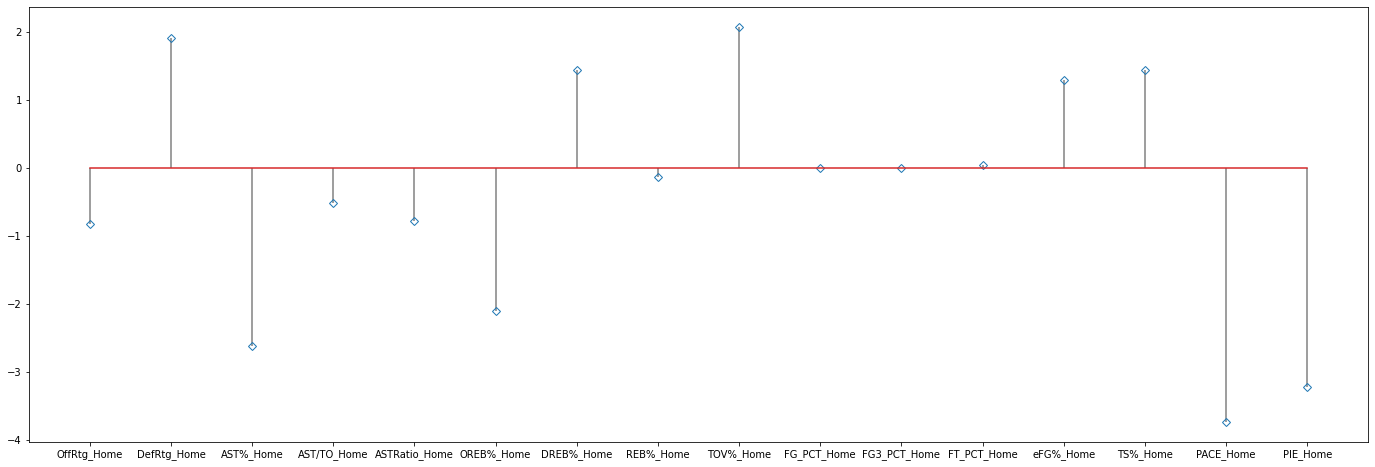

SAS


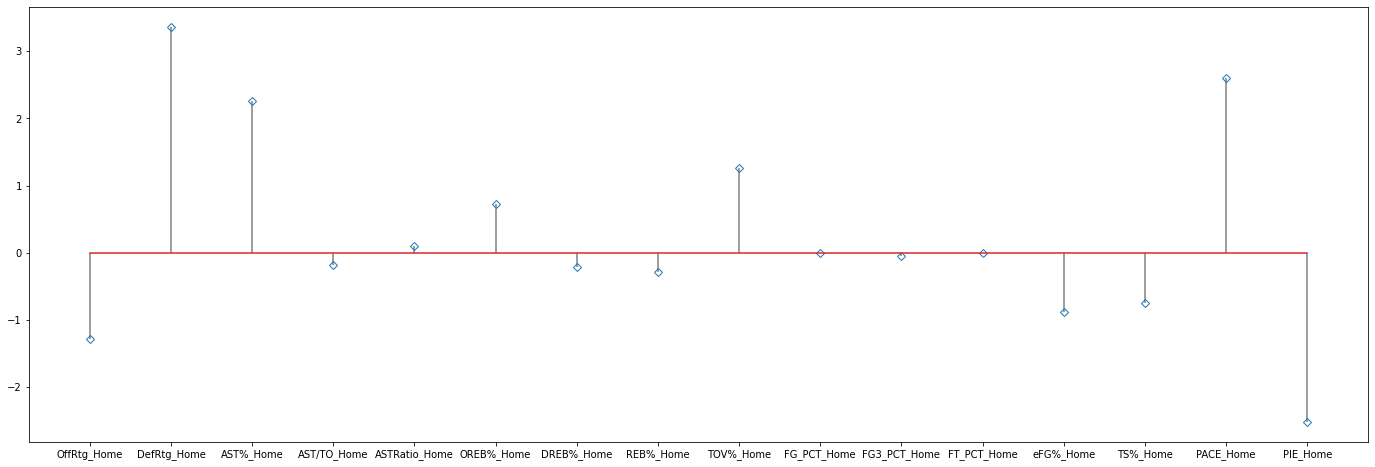

TOR


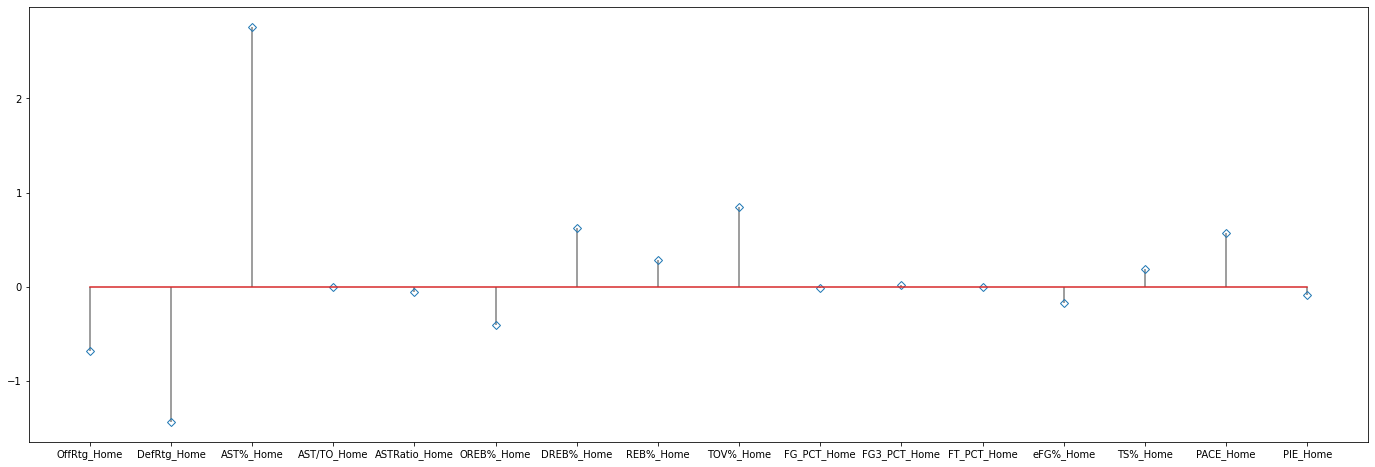

UTA


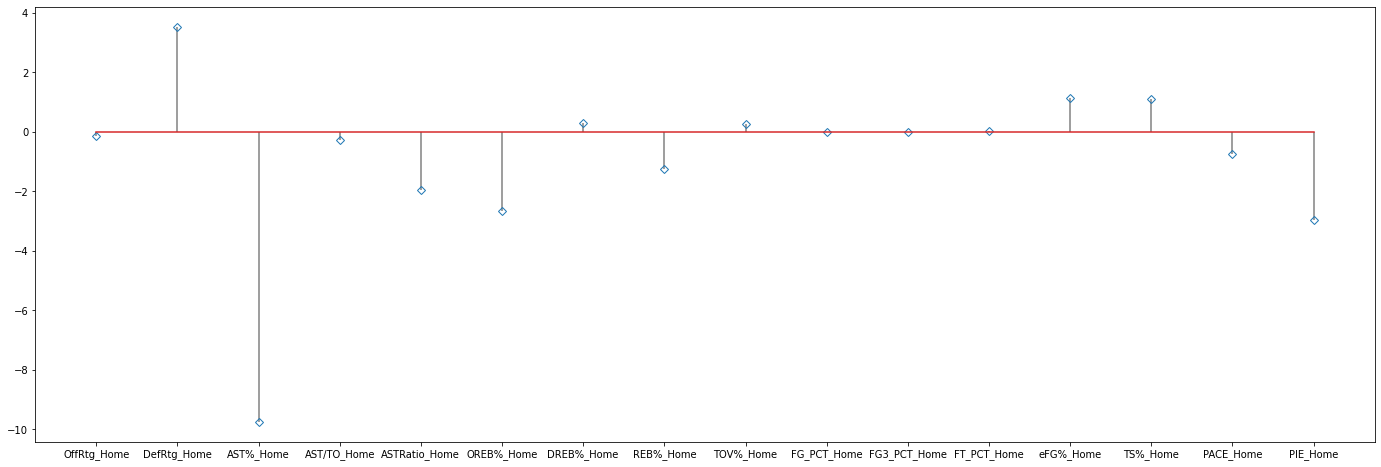

WAS


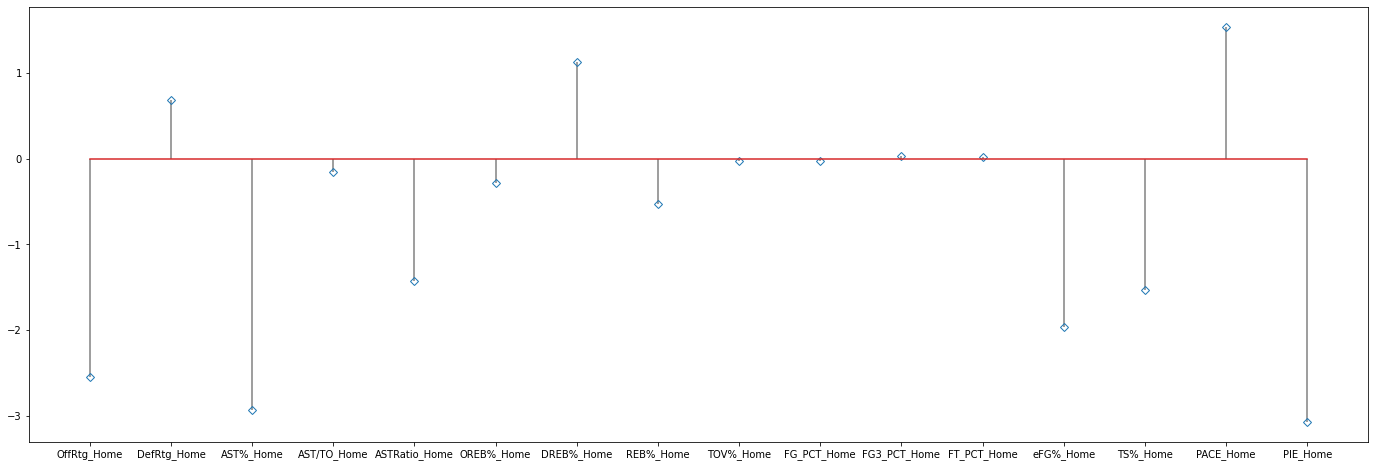

In [322]:
for i in range (len(team_names)):
    print(team_names[i])
    x = df_team_diff.columns[1:-1]
    y = df_team_diff[df_team_diff["Teams"]==team_names[i]].iloc[0,1:-1]
    plt.figure(figsize=(24,8))
    markerline, stemlines, baseline = plt.stem(
        x, y, linefmt ='grey', markerfmt ='D',
        bottom = bottom, use_line_collection = True)

    markerline.set_markerfacecolor('none')

    plt.show()

### Does teams have homecourt advantages? 
* Winning percentage in each season.
* NetRtg, AST/TO , REB%, eFG% attributes to home teams winning.

In [123]:
home_court=["Winning_Home",  'AST/TO_Home',
        'REB%_Home',  'eFG%_Home','NetRtg_Away', 'AST/TO_Away','REB%_Away',  'eFG%_Away','season']


df_HA_overall=df_team[home_court].groupby(by=["season"]).mean()
df_HA_overall


,Winning_Home,AST/TO_Home,REB%_Home,eFG%_Home,NetRtg_Away,AST/TO_Away,REB%_Away,eFG%_Away
season,,,,,,,,
18,0.592020,1.953233,50.673860,53.141042,-2.557329,1.881360,49.326710,51.939414
19,0.551464,1.886138,50.691690,53.522380,-2.120208,1.811114,49.308782,52.515864
20,0.543519,1.968731,50.519074,54.183981,-0.954907,1.982157,49.481481,53.619352
21,0.543902,1.999650,50.334065,53.696992,-1.685366,1.900415,49.666341,52.870650


In [124]:
#looking at each games.
df_HA=df_team[home_court]


In [126]:

k=1

for i in diff_columns:    
    df_HA[i]=df_HA.iloc[:,k]-df_HA.iloc[:,k+4]
    k=k+1

    
df_HA

,Winning_Home,AST/TO_Home,REB%_Home,eFG%_Home,NetRtg_Away,AST/TO_Away,REB%_Away,eFG%_Away,season,diff_AST/TO,diff_REB%,diff_eFG%
324,1,3.25,51.5,64.4,-18.4,2.25,48.5,51.1,21,1.00,3.0,13.3
325,1,2.13,55.7,65.9,-10.0,3.25,44.3,54.5,21,-1.12,11.4,11.4
326,0,1.31,35.0,42.8,30.5,1.35,65.0,50.6,21,-0.04,-30.0,-7.8
327,0,3.00,43.3,55.6,17.7,2.23,56.7,63.8,21,0.77,-13.4,-8.2
328,1,3.30,51.0,62.1,-11.6,2.00,49.0,52.7,21,1.30,2.0,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
4916,1,1.24,52.5,45.7,-4.0,1.47,47.5,51.8,18,-0.23,5.0,-6.1
4917,1,2.10,43.6,56.5,-12.0,1.06,56.4,44.1,18,1.04,-12.8,12.4
4918,1,1.83,54.1,48.9,-1.8,1.82,45.9,46.2,18,0.01,8.2,2.7
4919,1,1.67,48.8,45.2,-2.9,0.94,51.2,43.8,18,0.73,-2.4,1.4


In [127]:
df_HA.min()

Winning_Home       0
AST/TO_Home     0.42
REB%_Home       34.9
eFG%_Home       30.1
NetRtg_Away    -74.5
AST/TO_Away     0.45
REB%_Away       33.0
eFG%_Away       31.9
season            18
diff_AST/TO     -8.7
diff_REB%      -30.2
diff_eFG%      -39.8
dtype: object

In [128]:
df_HA.max()

Winning_Home        1
AST/TO_Home      25.0
REB%_Home        67.0
eFG%_Home        75.3
NetRtg_Away      59.6
AST/TO_Away      11.5
REB%_Away        65.1
eFG%_Away        79.5
season             21
diff_AST/TO     22.67
diff_REB%        34.0
diff_eFG%        34.1
dtype: object

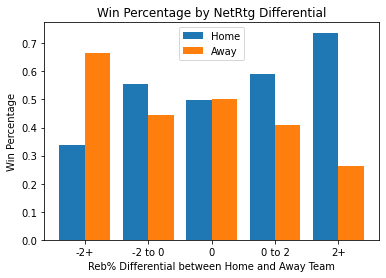

Win% when dif is zero: 0.4973821989528796


In [133]:
#calculate win percentage based on NetRtg differential for home team
win1 = df_HA.loc[df_HA['diff_REB%'] < -2, "Winning_Home"].mean()
win2 = df_HA.loc[(df_HA['diff_REB%'] >= -2) & (df_HA['diff_REB%'] < 0), "Winning_Home"].mean()
win3 = df_HA.loc[df_HA['diff_REB%'] == 0, "Winning_Home"].mean()
win4 = df_HA.loc[(df_HA['diff_REB%'] > 0) & (df_HA['diff_REB%'] <= 2), "Winning_Home"].mean()
win5 = df_HA.loc[df_HA['diff_REB%'] > 2, "Winning_Home"].mean()

labels = ['-2+', '-2 to 0', '0','0 to 2', '2+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('Reb% Differential between Home and Away Team')
ax.set_title('Win Percentage by NetRtg Differential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

print("Win% when dif is zero:",df_HA.loc[df_HA['diff_REB%'] == 0, "Winning_Home"].mean())

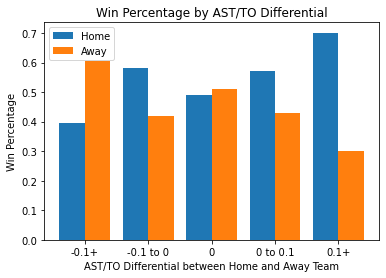

Win% when dif is zero: 0.49019607843137253


In [135]:
#calculate win percentage based on NetRtg differential for home team
win1 = df_HA.loc[df_HA['diff_AST/TO'] < -0.1, "Winning_Home"].mean()
win2 = df_HA.loc[(df_HA['diff_AST/TO'] >= -0.1) & (df_HA['diff_AST/TO'] < 0), "Winning_Home"].mean()
win3 = df_HA.loc[df_HA['diff_AST/TO'] == 0, "Winning_Home"].mean()
win4 = df_HA.loc[(df_HA['diff_AST/TO'] > 0) & (df_HA['diff_AST/TO'] <= 0.1), "Winning_Home"].mean()
win5 = df_HA.loc[df_HA['diff_AST/TO'] > 0.1, "Winning_Home"].mean()

labels = ['-0.1+', '-0.1 to 0', '0','0 to 0.1', '0.1+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('AST/TO Differential between Home and Away Team')
ax.set_title('Win Percentage by AST/TO Differential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

print("Win% when dif is zero:",df_HA.loc[df_HA['diff_AST/TO'] == 0, "Winning_Home"].mean())

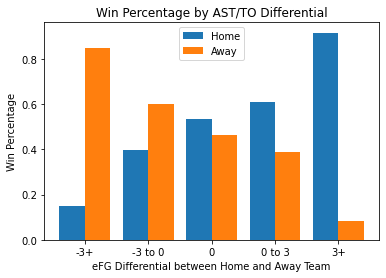

Win% when dif is zero: 0.5357142857142857


In [138]:
#calculate win percentage based on NetRtg differential for home team
win1 = df_HA.loc[df_HA['diff_eFG%'] < -3, "Winning_Home"].mean()
win2 = df_HA.loc[(df_HA['diff_eFG%'] >= -3) & (df_HA['diff_eFG%'] < 0), "Winning_Home"].mean()
win3 = df_HA.loc[df_HA['diff_eFG%'] == 0, "Winning_Home"].mean()
win4 = df_HA.loc[(df_HA['diff_eFG%'] > 0) & (df_HA['diff_eFG%'] <= 3), "Winning_Home"].mean()
win5 = df_HA.loc[df_HA['diff_eFG%'] > 3, "Winning_Home"].mean()

labels = ['-3+', '-3 to 0', '0','0 to 3', '3+']
home_win_perc = [win1,win2,win3,win4,win5]
away_win_perc = [1-win1,1-win2,1-win3,1-win4,1-win5]

x = np.arange(len(labels))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
home = ax.bar(x - width/2, home_win_perc, width, label='Home')
away = ax.bar(x + width/2, away_win_perc, width, label='Away')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Win Percentage')
ax.set_xlabel('eFG Differential between Home and Away Team')
ax.set_title('Win Percentage by AST/TO Differential')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

print("Win% when dif is zero:",df_HA.loc[df_HA['diff_eFG%'] == 0, "Winning_Home"].mean())

### OLS

In [56]:
import statsmodels.api as sm
import scipy.stats as stats

ols_columns=['OffRtg_Home',
       'DefRtg_Home', 'NetRtg_Home', 'AST%_Home', 'AST/TO_Home',
       'ASTRatio_Home', 'OREB%_Home', 'DREB%_Home', 'REB%_Home', 'TOV%_Home',
       'FGM_Home', 'FGA_Home', 'FG_PCT_Home', 'FG3M_Home', 'FG3A_Home',
       'FG3_PCT_Home', 'FTM_Home', 'FTA_Home', 'FT_PCT_Home', 'eFG%_Home',
       'TS%_Home', 'PACE_Home', 'PIE_Home', 'OffRtg_Away',
       'DefRtg_Away', 'NetRtg_Away', 'AST%_Away', 'AST/TO_Away',
       'ASTRatio_Away', 'OREB%_Away', 'DREB%_Away', 'REB%_Away', 'TOV%_Away',
       'FGM_Away', 'FGA_Away', 'FG_PCT_Away', 'FG3M_Away', 'FG3A_Away',
       'FG3_PCT_Away', 'FTM_Away', 'FTA_Away', 'FT_PCT_Away', 'eFG%_Away',
       'TS%_Away', 'PACE_Away', 'PIE_Away']


y = df_team.Winning_Home  # response
X = df_team[ols_columns] # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor

In [59]:
est = sm.OLS(y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Winning_Home   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     214.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:00:51   Log-Likelihood:                -796.58
No. Observations:                4597   AIC:                             1679.
Df Residuals:                    4554   BIC:                             1956.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -38.1881     98.300     -0.388      0.698    -230.903     154.527
OffRtg_Home      -0.0482      0.047     -1.031      0.303      -0.140       0.043
DefRtg_Home       0.0469      0.047      1.003      0.316      -0.045       0.139
NetRtg_Home       0.0517      0.047      1.107      0.268      -0.040       0.143
AST%_Home         0.0091      0.005      2.017      0.044       0.000       0.018
AST/TO_Home      -0.0016      0.009     -0.167      0.867      -0.020       0.017
ASTRatio_Home    -0.0470      0.019     -2.531      0.011      -0.083      -0.011
OREB%_Home        0.0537      0.408      0.132      0.895      -0.747       0.854
DREB%_Home        0.0493      0.409      0.121      0.904      -0.753       0.852
REB%_Home         0.2513      0.608      0.413      0.679      -0.941       1.443
TOV%_Home        -0.0098      0.004     -2.362      0.018      -0.018      -0.002
FGM_Home          0.0031      0.014      0.228      0.819      -0.024       0.030
FGA_Home          0.0081      0.006      1.316      0.188      -0.004       0.020
FG_PCT_Home      -0.3001      3.125     -0.096      0.923      -6.426       5.826
FG3M_Home        -0.0076      0.016     -0.464      0.643      -0.040       0.024
FG3A_Home        -0.0017      0.003     -0.627      0.530      -0.007       0.004
FG3_PCT_Home      0.2889      0.235      1.231      0.218      -0.171       0.749
FTM_Home          0.0274      0.012      2.268      0.023       0.004       0.051
FTA_Home         -0.0098      0.007     -1.432      0.152      -0.023       0.004
FT_PCT_Home      -0.1261      0.130     -0.969      0.332      -0.381       0.129
eFG%_Home         0.0461      0.030      1.513      0.130      -0.014       0.106
TS%_Home         -0.0155      0.021     -0.725      0.469      -0.058       0.027
PACE_Home        -0.0005      0.001     -0.594      0.552      -0.002       0.001
PIE_Home          0.0319      0.508      0.063      0.950      -0.963       1.027
OffRtg_Away       0.0469      0.047      1.003      0.316      -0.045       0.139
DefRtg_Away      -0.0482      0.047     -1.031      0.303      -0.140       0.043
NetRtg_Away      -0.0517      0.047     -1.107      0.268      -0.143       0.040
AST%_Away        -0.0052      0.004     -1.182      0.237      -0.014       0.003
AST/TO_Away      -0.0229      0.013     -1.831      0.067      -0.047       0.002
ASTRatio_Away     0.0286      0.018      1.560      0.119      -0.007       0.064
OREB%_Away        0.0462      0.409      0.113      0.910      -0.756       0.849
DREB%_Away        0.0499      0.408      0.122      0.903      -0.751       0.851
REB%_Away         0.2564      0.608      0.422      0.673      -0.936       1.448
TOV%_Away         0.0002      0.004      0.047      0.962      -0.008       0.009
FGM_Away         -0.0329      0.014     -2.308   

### Heat map

In [224]:
import seaborn as sns

In [227]:
Heatmap_column=["Winning_Home",'OffRtg_Home',
       'DefRtg_Home', 'NetRtg_Home', 'AST%_Home', 'AST/TO_Home',
       'ASTRatio_Home', 'OREB%_Home', 'DREB%_Home', 'REB%_Home', 'TOV%_Home',
         'FG_PCT_Home',
       'FG3_PCT_Home', 'FT_PCT_Home', 'eFG%_Home',
       'TS%_Home', 'PACE_Home', 'PIE_Home',  'OffRtg_Away',
       'DefRtg_Away', 'NetRtg_Away', 'AST%_Away', 'AST/TO_Away',
       'ASTRatio_Away', 'OREB%_Away', 'DREB%_Away', 'REB%_Away', 'TOV%_Away',
       'FG_PCT_Away', 
       'FG3_PCT_Away',  'FT_PCT_Away', 'eFG%_Away',
       'TS%_Away', 'PACE_Away', 'PIE_Away']

<AxesSubplot:>

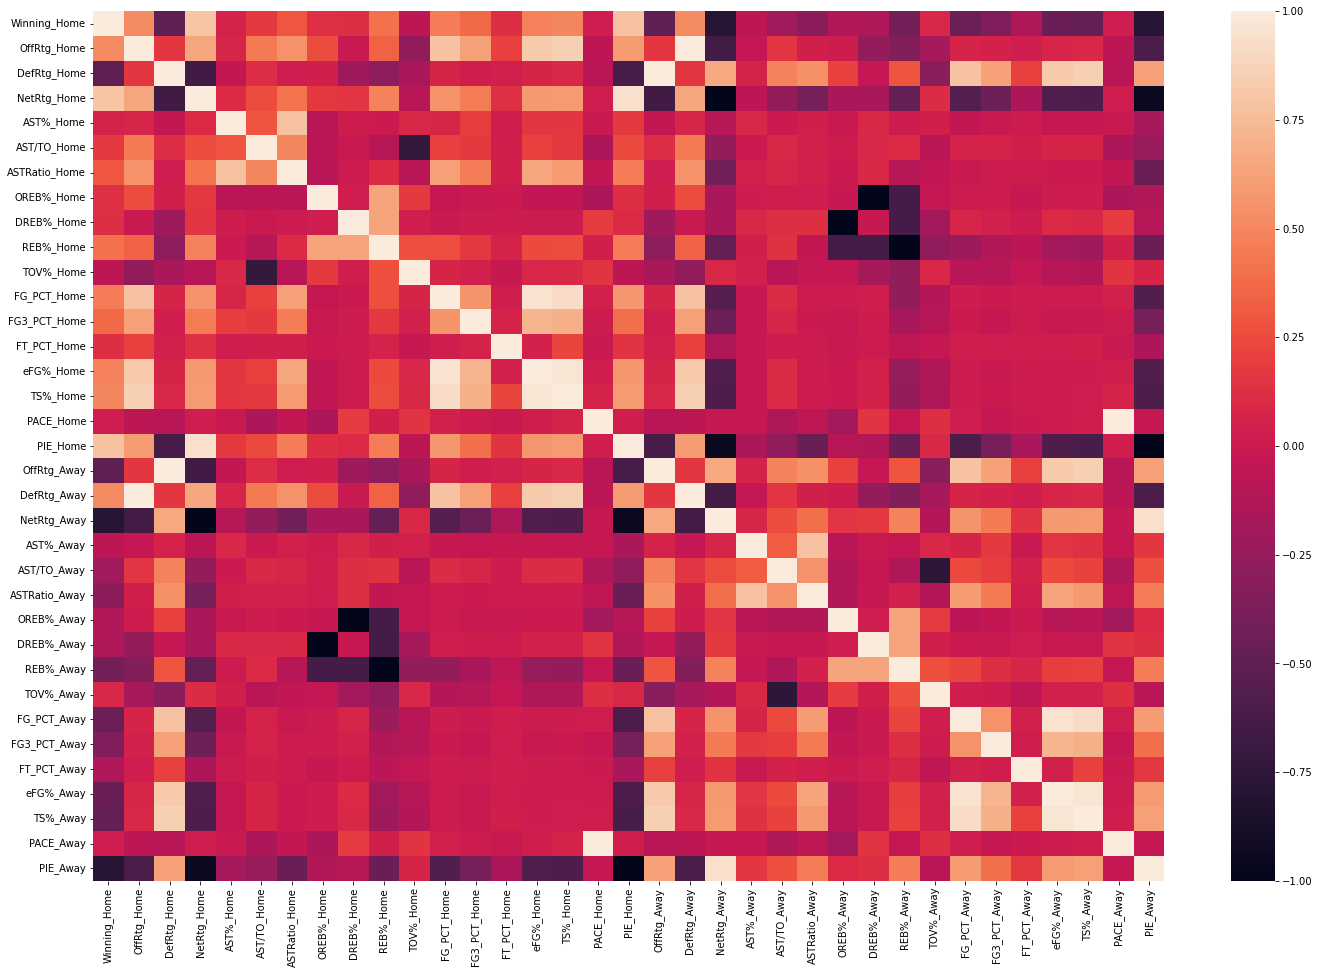

In [229]:


plt.figure(figsize=(24,16))
sns.heatmap(df_team[Heatmap_column].corr())

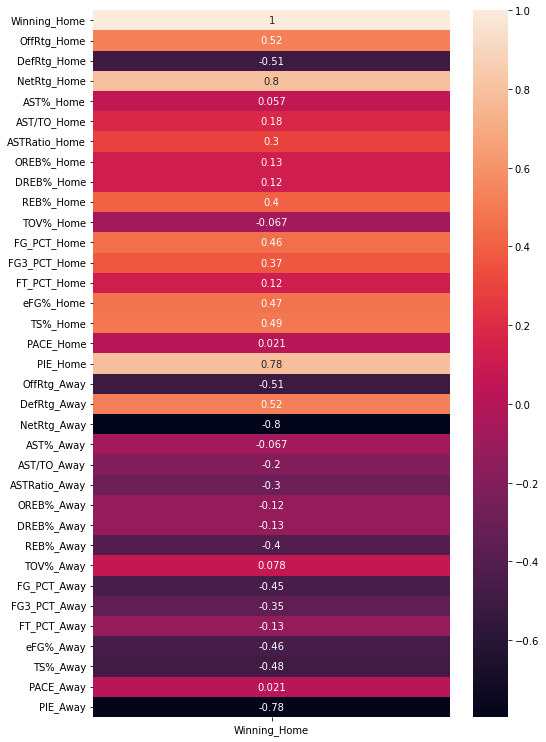

In [230]:
plt.figure(figsize=(8, 13))
heatmap = sns.heatmap(df_team[Heatmap_column].corr()[['Winning_Home']], annot=True)